# **1.  라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# **2. 데이터 준비**

- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 피트를 초과하는 주거용 토지의 비율
- INDUS: 비상업 면적의 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방의 개수
- AGE: 1940년 이전에 건축된 자가주택의 비율
- DIS: 5개의 보스턴 고용 센터와의 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000달러당 재산세율
- PTRATIO: 도시별 교사와 학생 수 비율
- B: 마을의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러) --- target 데이터

### **2-1. 학습용 데이터 준비**

In [2]:
### 데이터 불러오기

train = pd.read_csv('./datasets/train.csv')
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [3]:
### 학습용 데이터 수 확인

len(train)

455

In [4]:
### 데이터 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


- 데이터 세트 feature의 null값은 존재하지 않음
- ID를 제외한 모든 컬럼이 float형임

In [5]:
### 데이터 통계치 확인

train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


- 데이터 간의 스케일 차이가 상당함을 확인할 수 있다.

In [6]:
X = train.drop(columns=['ID', 'MEDV']) # ID 컬럼의 경우 불필요하므로 제거
y = train['MEDV'] 

In [7]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.1,random_state = 0)

# train: 학습에 사용할 훈련용 데이터
# valid: 학습 결과 평가에 사용할 테스트용 데이터

In [8]:
X_train.shape, X_valid.shape

((409, 13), (46, 13))

In [9]:
X_train.head(3) # feature data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
340,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
448,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12


In [10]:
X_valid.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
354,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
60,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
293,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98


In [11]:
y_train.shape, y_valid.shape

((409,), (46,))

In [12]:
y_train.head(3) # target data

141    28.0
340    24.7
448    25.0
Name: MEDV, dtype: float64

In [13]:
y_valid.head(3)

354    37.3
60     18.4
293    26.4
Name: MEDV, dtype: float64

### **2-2. 예측용 데이터 준비**
- 정답(target data)가 없는 데이터

In [14]:
### 데이터 불러오기

test = pd.read_csv("./datasets/test.csv")
test = test.drop(columns = ['ID']) # ID 컬럼의 경우 불필요하므로 제거
test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
1,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
2,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73


In [15]:
### 예측용 데이터 수 확인

len(test)

51

In [16]:
### 데이터 정보 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     51 non-null     float64
 1   ZN       51 non-null     float64
 2   INDUS    51 non-null     float64
 3   CHAS     51 non-null     float64
 4   NOX      51 non-null     float64
 5   RM       51 non-null     float64
 6   AGE      51 non-null     float64
 7   DIS      51 non-null     float64
 8   RAD      51 non-null     float64
 9   TAX      51 non-null     float64
 10  PTRATIO  51 non-null     float64
 11  B        51 non-null     float64
 12  LSTAT    51 non-null     float64
dtypes: float64(13)
memory usage: 5.3 KB


- 결측치는 존재하지 않음을 확인할 수 있다.

# **3. 데이터 전처리**

## **3-1. 피쳐(feature) 데이터 변환**

### **StandardScaler**
- 분석 시 변수들의 스케일이 다른 경우 컬럼 별 단위 또는 범위를 통일시켜주기 위해 표준화를 수행
- 표준화: 데이터 값들을 평균이 0이고 분산이 1인 정규 분포로 만드는 것

In [17]:
from sklearn.preprocessing import StandardScaler

### StandardScaler 객체 생성
scaler = StandardScaler()

### 학습 데이터에 대해서만 fit(), transform() 수행
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

### 테스트 데이터 스케일링
# 학습할 때와 동일한 기반 설정으로 동일하게 테스트 데이터를 변환해야 함
# 테스트 데이터에서는 transform만 수행
scaled_X_valid = scaler.transform(X_valid)

### 예측용 데이터 스케일링
scaled_test = scaler.transform(test)

In [18]:
### 학습용 데이터

pd.DataFrame(scaled_X_train,columns = X_train.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.401507,0.588942,-0.912798,-0.276253,-1.103629,0.608020,-1.253647,0.776612,-0.633338,-0.755190,0.265600,0.445919,-1.022478
1,-0.388418,-0.498933,-0.613894,-0.276253,-0.916244,-0.126920,-2.222987,0.929976,-0.748464,-1.039756,-0.237742,0.419267,-0.724799
2,-0.368300,-0.498933,-0.545365,-0.276253,-0.532955,0.163638,-1.016697,0.451109,-0.518211,-0.719619,0.540150,0.445919,-0.907560


In [19]:
### 평가용 데이터

pd.DataFrame(scaled_X_valid,columns = X_valid.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397330,2.982266,-0.899676,-0.276253,-1.231392,1.207651,-1.461875,0.640587,-0.633338,-0.968614,0.357116,0.445919,-1.262006
1,-0.320487,-0.498933,-0.434551,-0.276253,-0.149667,0.277582,0.932754,0.323513,-0.633338,-0.601050,1.180766,0.348049,0.017322
2,-0.396863,-0.498933,-1.262735,-0.276253,-0.575543,-0.991470,0.767607,-0.379029,-0.748464,-1.276894,-0.283500,0.381473,0.180700


In [20]:
### 예측용 데이터

pd.DataFrame(scaled_test,columns = test.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.393806,-0.498933,0.403839,3.619869,-0.047457,-0.497238,0.911213,-0.426255,-0.518211,-0.784832,-0.924117,0.445919,0.726214
1,0.317809,-0.498933,1.017687,3.619869,0.642463,1.019643,1.044049,-1.234218,1.669196,1.527266,0.814700,0.392943,-1.345080
2,0.196298,-0.498933,1.017687,-0.276253,1.340900,0.505470,1.069180,-0.682069,1.669196,1.527266,0.814700,-0.008589,0.699908


- 표준화가 제대로 진행된 것을 확인할 수 있다.

## **3-2. 타겟(target) 데이터 변환**

In [21]:
scaled_y_train = np.log1p(y_train)

In [22]:
scaled_y_train.head(3)

141    3.367296
340    3.246491
448    3.258097
Name: MEDV, dtype: float64

# **4. 평가 지표 만들기**

### **4-1. MSE(Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
- ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### **4-2. MAE(Mean Absolute Error)**
- 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
- $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### **4-3. RMSE(Root Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 후 루트를 씌운 값
- $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [23]:
### 모델별 성능 확인을 위한 함수

my_predictions = {} # 예측값을 저장할 빈 딕셔너리

### 예측 결과 시각화
def plot_predictions(name_,pred,actual): # model, 예측값, 실제값
    df = pd.DataFrame({'prediction' : pred,'actual' : y_valid})
    df = df.sort_values(by = 'actual').reset_index(drop = True) # 실제값 기준 오름차순 정렬
    
    plt.figure(figsize = (12,9))
    plt.scatter(df.index,df['prediction'],marker = 'x',color = 'r')
    plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'o',color = 'black')
    plt.title(name_,fontsize = 15)
    plt.legend(['prediction','actual'],fontsize = 12)
    plt.show()

### rmse(mean squared error) 계산    
def rmse_eval(name_,pred,actual):
    global my_predictions # 예측값
    global colors # 색상값
    
    ### 예측 결과 시각화
    plot_predictions(name_,pred,actual) 
    print()
    
    ### 모델별 rmse 계산
    rmse = np.sqrt(mean_squared_error(pred,actual)) # rmse 계산
    my_predictions[name_] = rmse
    y_value = sorted(my_predictions.items(),key = lambda x: x[1]) # 오름차순 정렬
    df = pd.DataFrame(y_value, columns = ['model','rmse'])
    print(df)

# **5. 모델링**

### **5-0. Model Hyperparameter Setting**
- 대부분의 모델들은 사람이 직접 설정할 수 있는 **hyper parameter**를 가지고 있음
- hyper parameter에 어떤 값이 설정되는가에 따라 모델의 성능은 크게 차이나게 된다.

### **5-1. LinearRegression**
- 선형 회귀
- 실제값과 예측값의 RSS(Residual Sum of Squares)를 최소화 해 OLS(Ordinary Least Squares) 추정 방식으로 구현
- 규제를 적용하지 **않은** 모델

In [24]:
### 모델 객체 생성

lr_model = LinearRegression(n_jobs = -1) # CPU Core를 있는 대로 모두 사용하겠다~

In [25]:
### 모델 학습

lr_model.fit(scaled_X_train,scaled_y_train) 

LinearRegression(n_jobs=-1)

In [26]:
### 예측

lr_pred_val = np.expm1(lr_model.predict(scaled_X_valid))

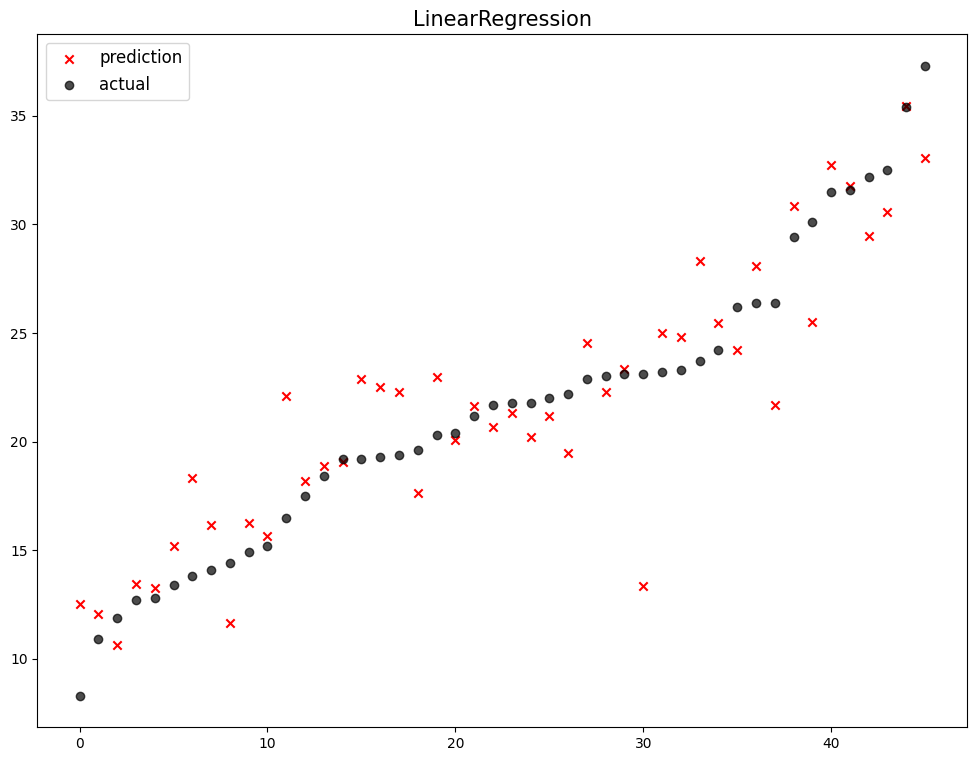


              model      rmse
0  LinearRegression  2.782956


In [27]:
### 평가

rmse_eval('LinearRegression',lr_pred_val,y_valid) # model, 예측값, 실제값

### **5-2. 라쏘(Lasso)**

In [28]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

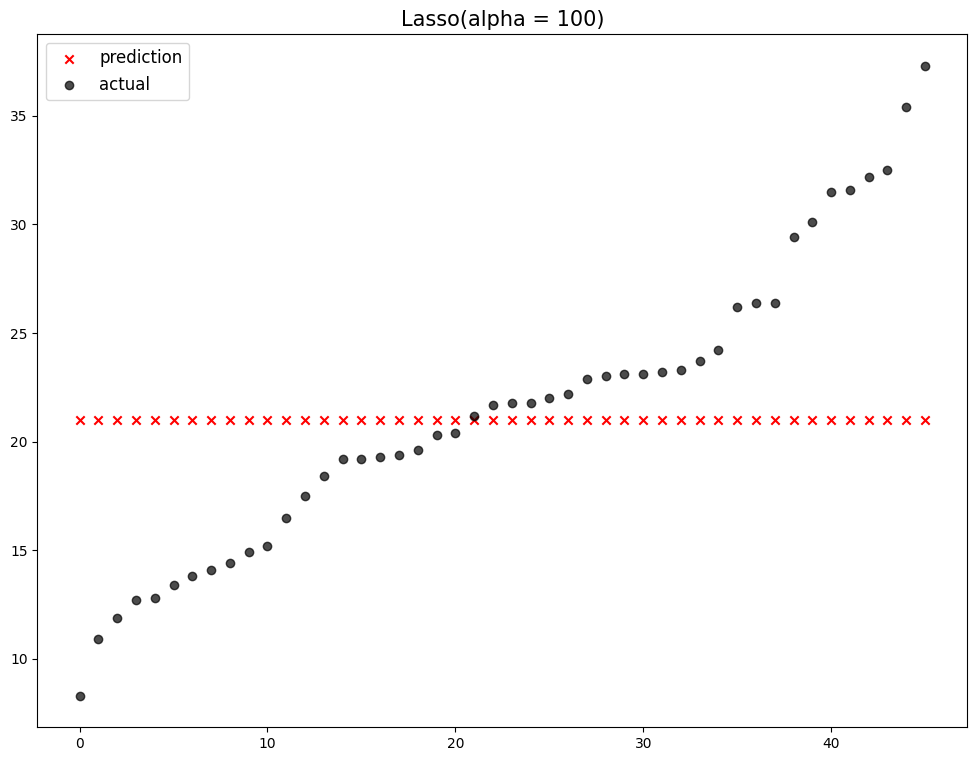


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060


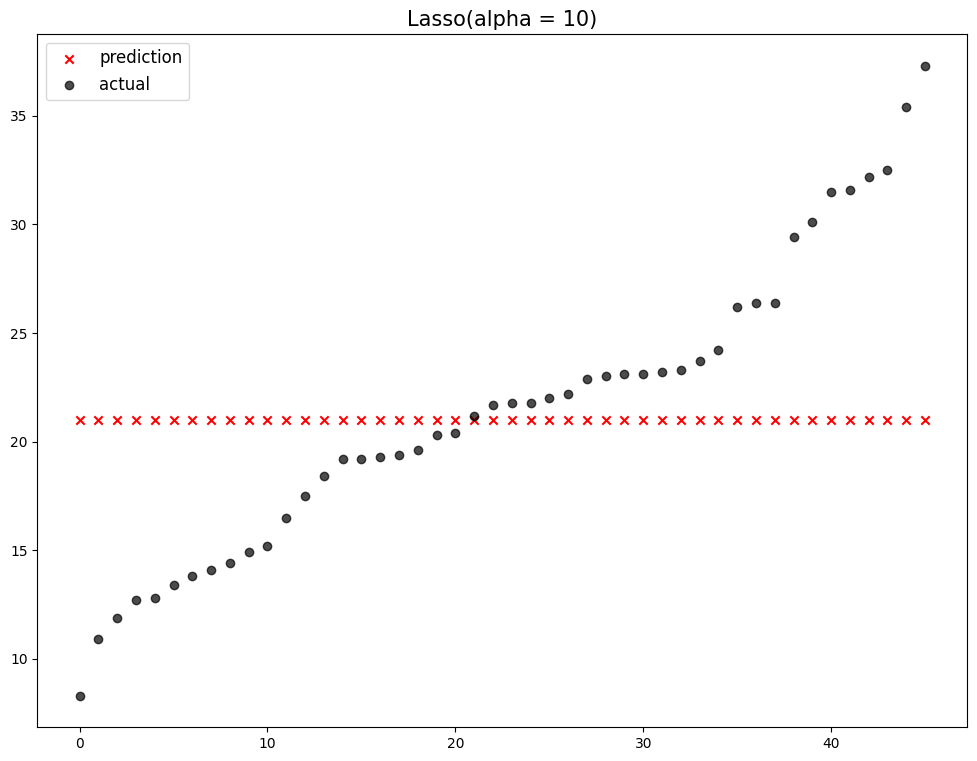


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060
2   Lasso(alpha = 10)  6.673060


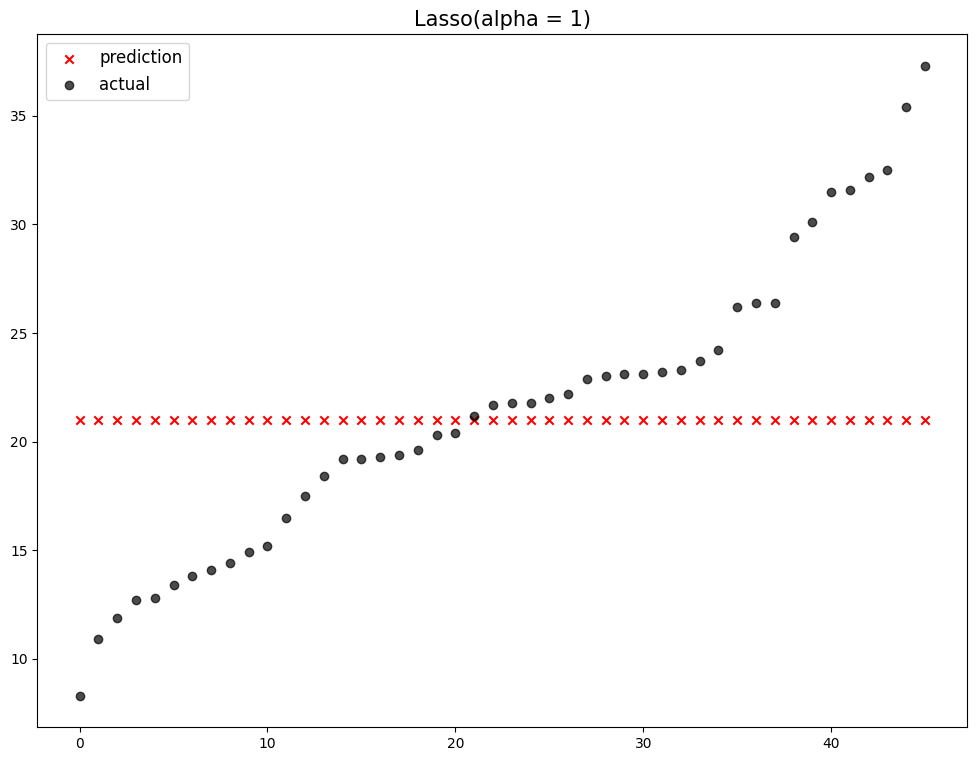


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060
2   Lasso(alpha = 10)  6.673060
3    Lasso(alpha = 1)  6.673060


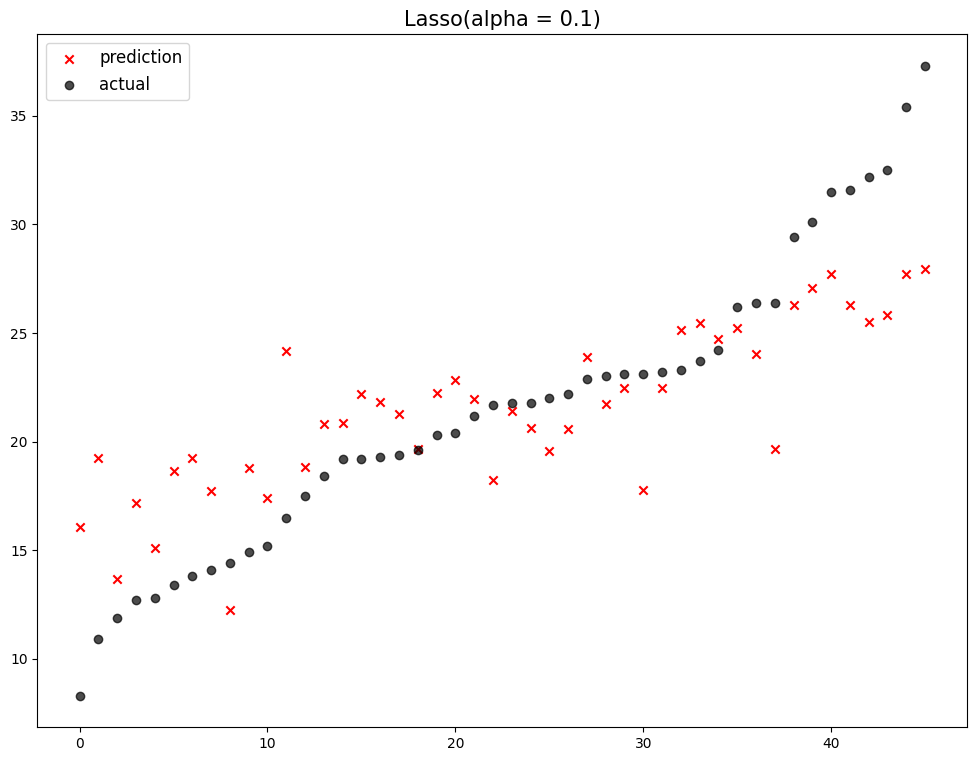


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 0.1)  4.068068
2  Lasso(alpha = 100)  6.673060
3   Lasso(alpha = 10)  6.673060
4    Lasso(alpha = 1)  6.673060


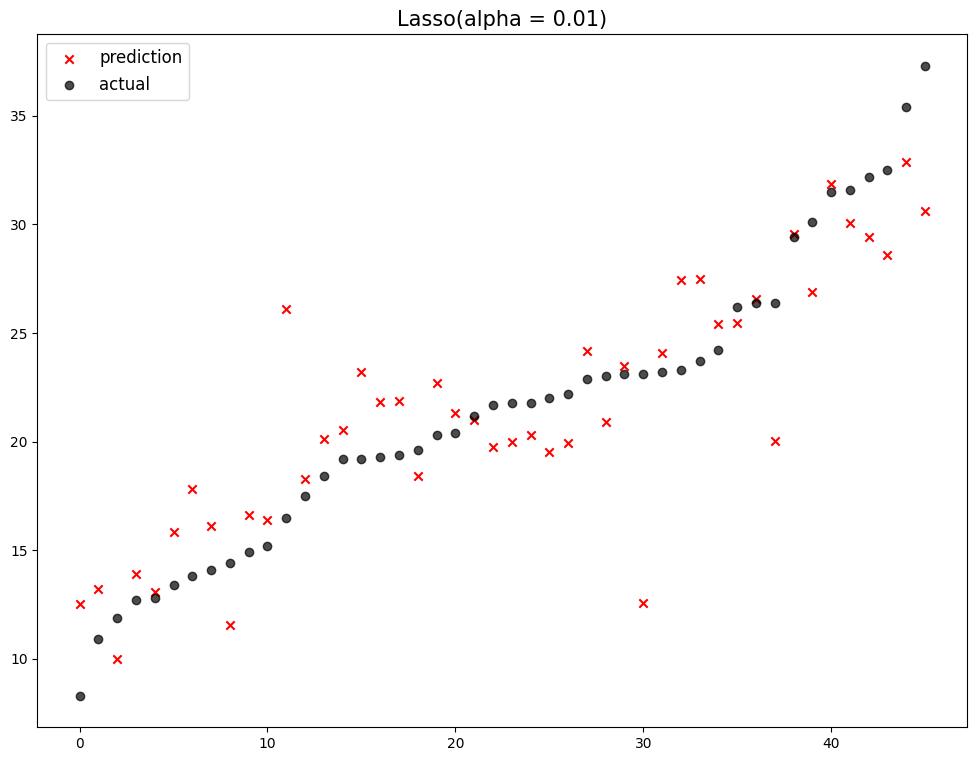


                 model      rmse
0     LinearRegression  2.782956
1  Lasso(alpha = 0.01)  3.300670
2   Lasso(alpha = 0.1)  4.068068
3   Lasso(alpha = 100)  6.673060
4    Lasso(alpha = 10)  6.673060
5     Lasso(alpha = 1)  6.673060


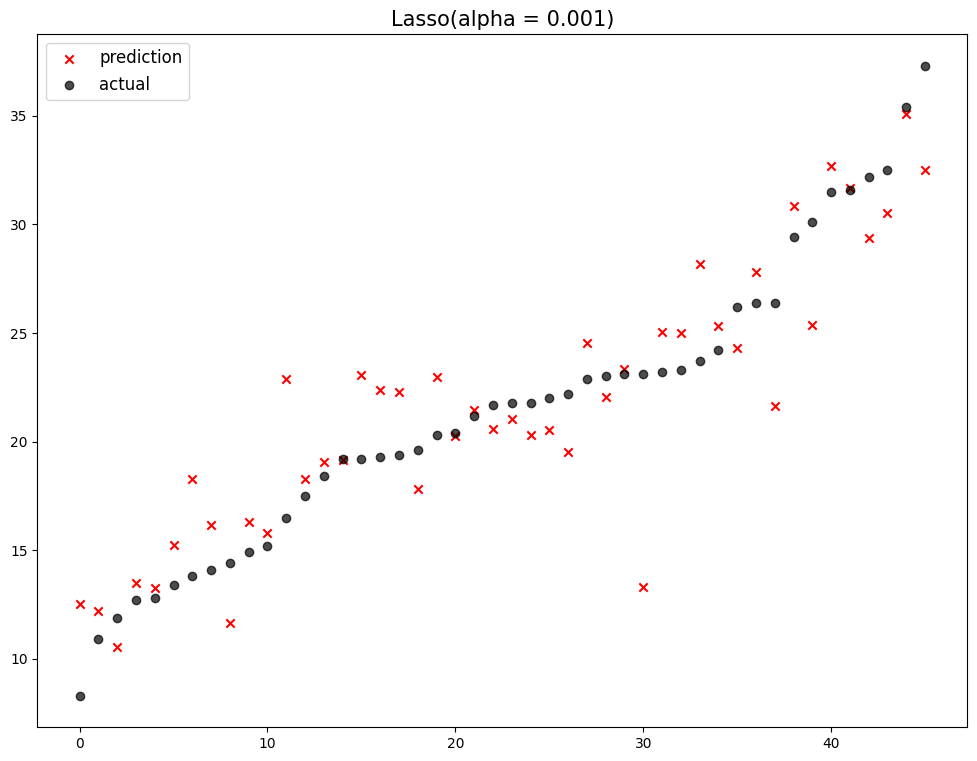


                  model      rmse
0      LinearRegression  2.782956
1  Lasso(alpha = 0.001)  2.855572
2   Lasso(alpha = 0.01)  3.300670
3    Lasso(alpha = 0.1)  4.068068
4    Lasso(alpha = 100)  6.673060
5     Lasso(alpha = 10)  6.673060
6      Lasso(alpha = 1)  6.673060


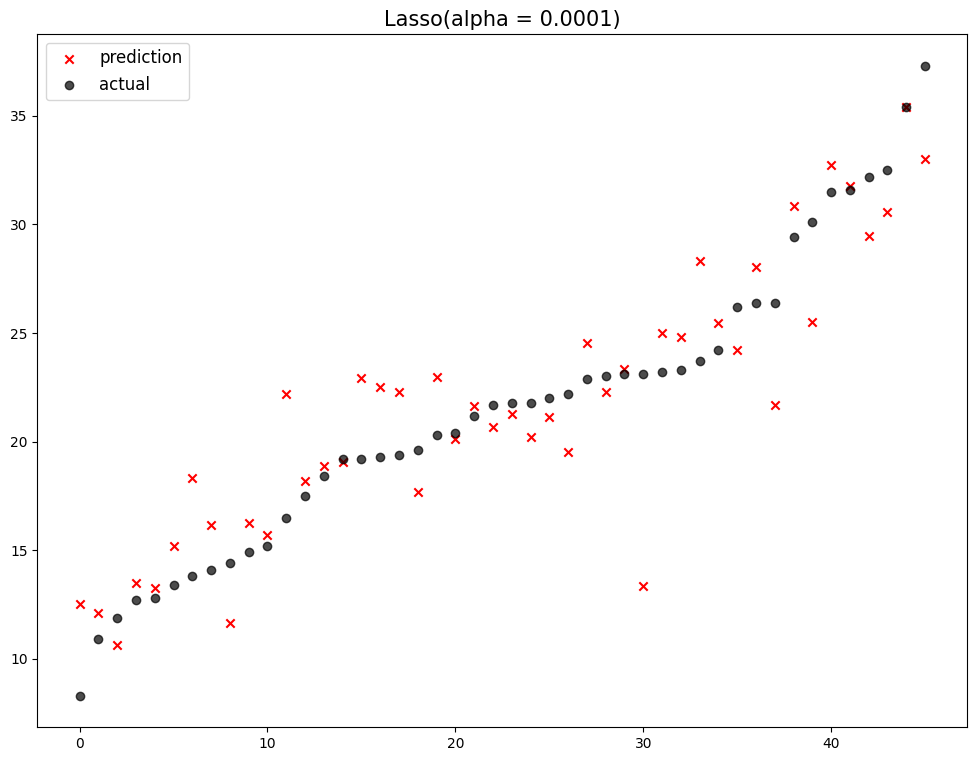


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.789500
2   Lasso(alpha = 0.001)  2.855572
3    Lasso(alpha = 0.01)  3.300670
4     Lasso(alpha = 0.1)  4.068068
5     Lasso(alpha = 100)  6.673060
6      Lasso(alpha = 10)  6.673060
7       Lasso(alpha = 1)  6.673060


In [29]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    lasso = Lasso(alpha = alpha) # 모델 객체 생성
    lasso.fit(scaled_X_train, scaled_y_train) # 학습
    pred = np.expm1(lasso.predict(scaled_X_valid)) # 예측
    rmse_eval('Lasso(alpha = {})'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-3. Ridge(Baseline에 제시된 모형)**

In [30]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

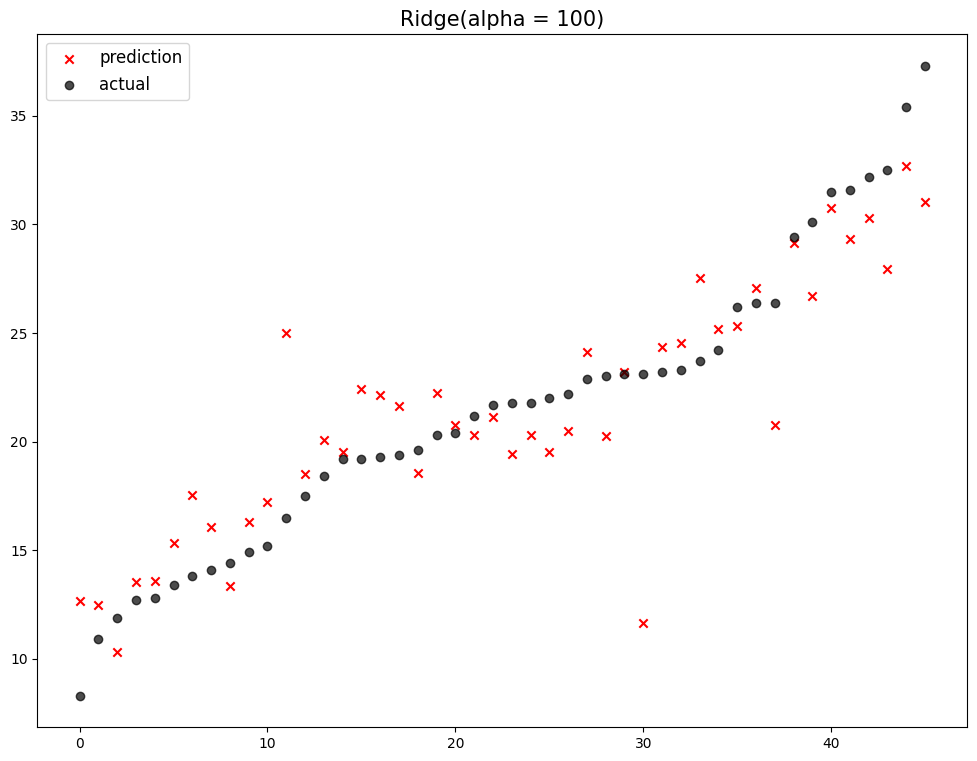


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.789500
2   Lasso(alpha = 0.001)  2.855572
3     Ridge(alpha = 100)  3.151137
4    Lasso(alpha = 0.01)  3.300670
5     Lasso(alpha = 0.1)  4.068068
6     Lasso(alpha = 100)  6.673060
7      Lasso(alpha = 10)  6.673060
8       Lasso(alpha = 1)  6.673060


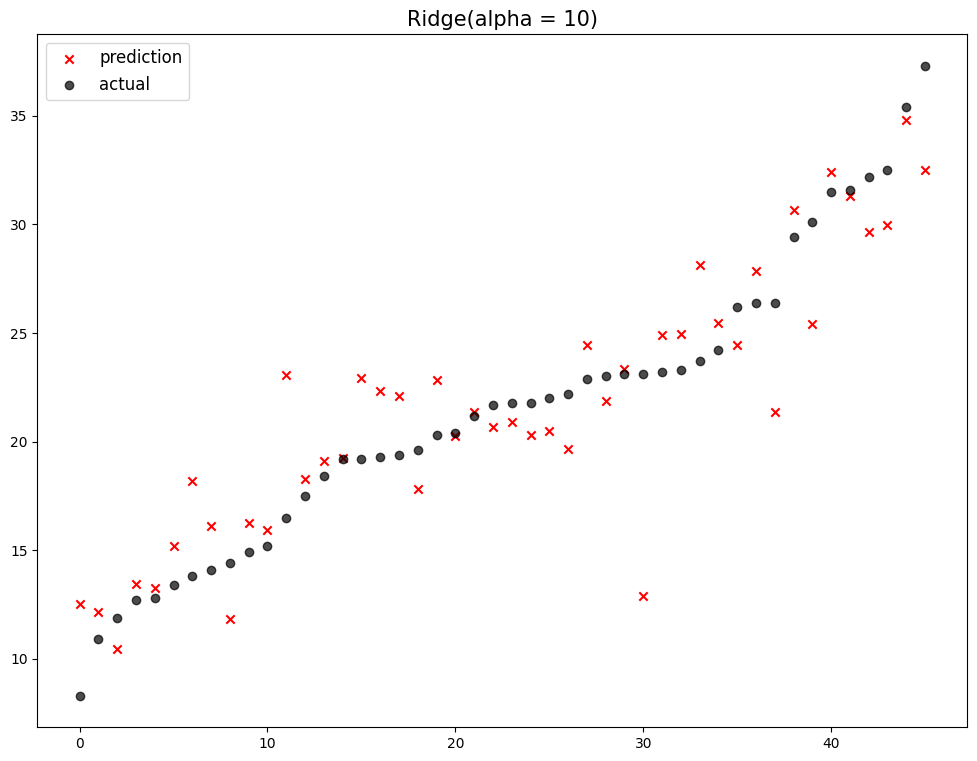


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.789500
2   Lasso(alpha = 0.001)  2.855572
3      Ridge(alpha = 10)  2.883008
4     Ridge(alpha = 100)  3.151137
5    Lasso(alpha = 0.01)  3.300670
6     Lasso(alpha = 0.1)  4.068068
7     Lasso(alpha = 100)  6.673060
8      Lasso(alpha = 10)  6.673060
9       Lasso(alpha = 1)  6.673060


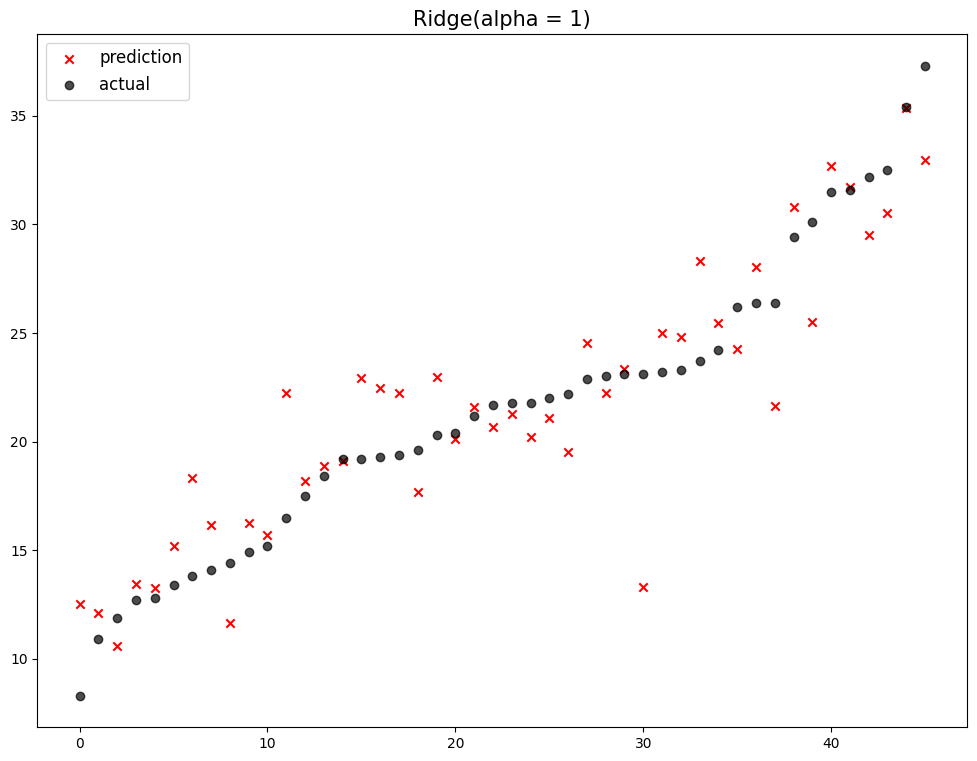


                    model      rmse
0        LinearRegression  2.782956
1   Lasso(alpha = 0.0001)  2.789500
2        Ridge(alpha = 1)  2.795203
3    Lasso(alpha = 0.001)  2.855572
4       Ridge(alpha = 10)  2.883008
5      Ridge(alpha = 100)  3.151137
6     Lasso(alpha = 0.01)  3.300670
7      Lasso(alpha = 0.1)  4.068068
8      Lasso(alpha = 100)  6.673060
9       Lasso(alpha = 10)  6.673060
10       Lasso(alpha = 1)  6.673060


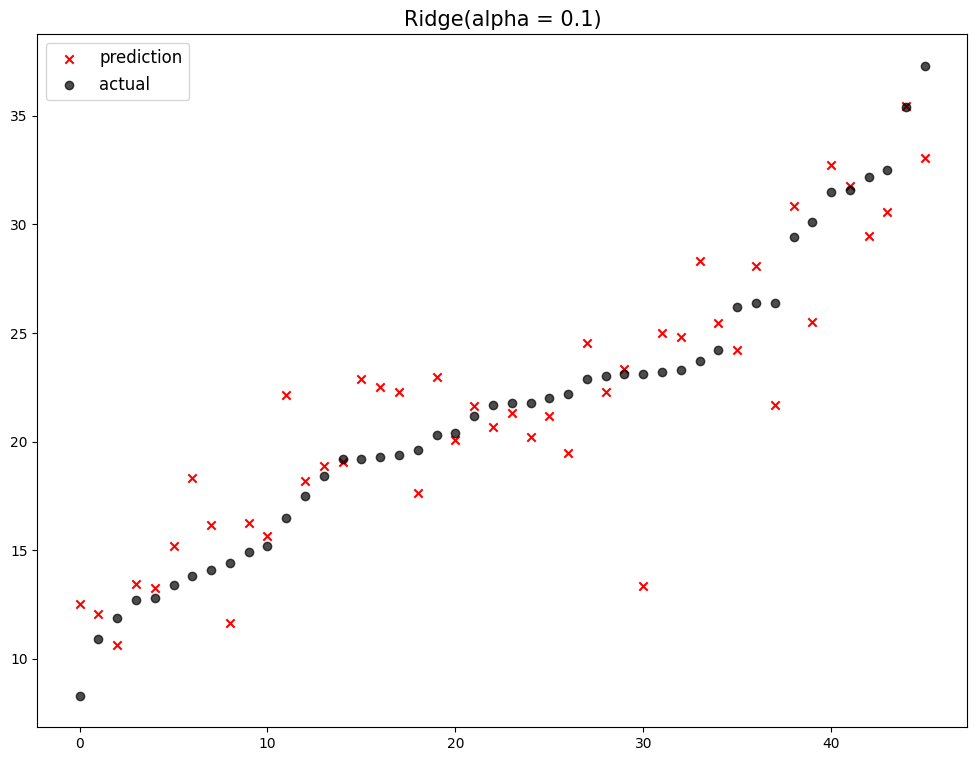


                    model      rmse
0        LinearRegression  2.782956
1      Ridge(alpha = 0.1)  2.784208
2   Lasso(alpha = 0.0001)  2.789500
3        Ridge(alpha = 1)  2.795203
4    Lasso(alpha = 0.001)  2.855572
5       Ridge(alpha = 10)  2.883008
6      Ridge(alpha = 100)  3.151137
7     Lasso(alpha = 0.01)  3.300670
8      Lasso(alpha = 0.1)  4.068068
9      Lasso(alpha = 100)  6.673060
10      Lasso(alpha = 10)  6.673060
11       Lasso(alpha = 1)  6.673060


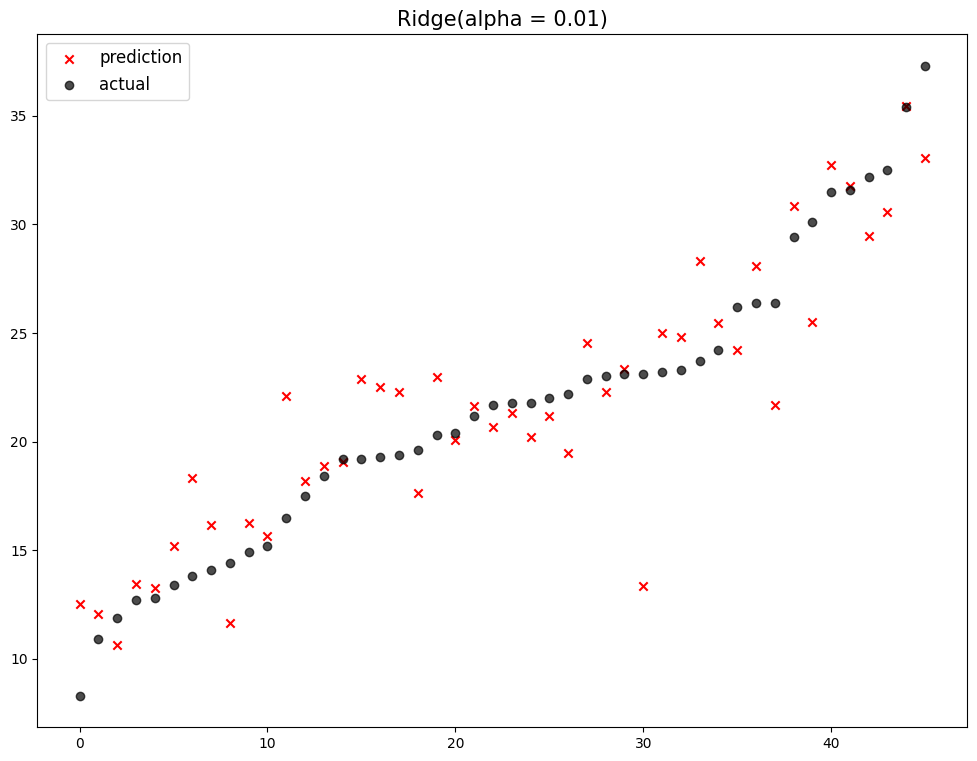


                    model      rmse
0        LinearRegression  2.782956
1     Ridge(alpha = 0.01)  2.783082
2      Ridge(alpha = 0.1)  2.784208
3   Lasso(alpha = 0.0001)  2.789500
4        Ridge(alpha = 1)  2.795203
5    Lasso(alpha = 0.001)  2.855572
6       Ridge(alpha = 10)  2.883008
7      Ridge(alpha = 100)  3.151137
8     Lasso(alpha = 0.01)  3.300670
9      Lasso(alpha = 0.1)  4.068068
10     Lasso(alpha = 100)  6.673060
11      Lasso(alpha = 10)  6.673060
12       Lasso(alpha = 1)  6.673060


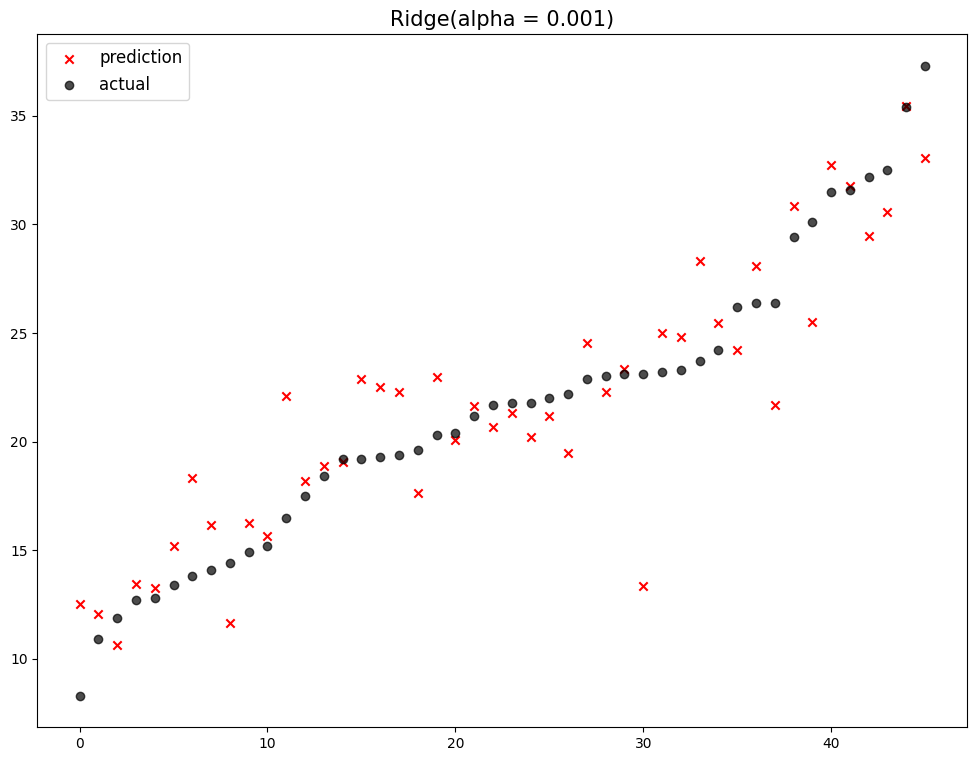


                    model      rmse
0        LinearRegression  2.782956
1    Ridge(alpha = 0.001)  2.782969
2     Ridge(alpha = 0.01)  2.783082
3      Ridge(alpha = 0.1)  2.784208
4   Lasso(alpha = 0.0001)  2.789500
5        Ridge(alpha = 1)  2.795203
6    Lasso(alpha = 0.001)  2.855572
7       Ridge(alpha = 10)  2.883008
8      Ridge(alpha = 100)  3.151137
9     Lasso(alpha = 0.01)  3.300670
10     Lasso(alpha = 0.1)  4.068068
11     Lasso(alpha = 100)  6.673060
12      Lasso(alpha = 10)  6.673060
13       Lasso(alpha = 1)  6.673060


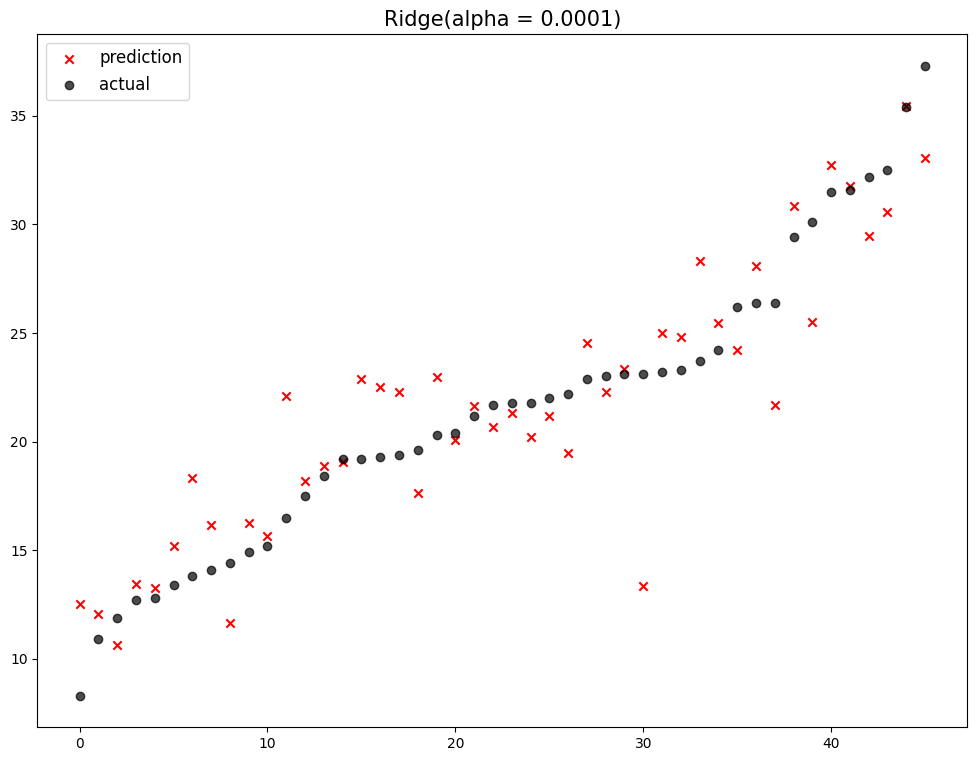


                    model      rmse
0        LinearRegression  2.782956
1   Ridge(alpha = 0.0001)  2.782958
2    Ridge(alpha = 0.001)  2.782969
3     Ridge(alpha = 0.01)  2.783082
4      Ridge(alpha = 0.1)  2.784208
5   Lasso(alpha = 0.0001)  2.789500
6        Ridge(alpha = 1)  2.795203
7    Lasso(alpha = 0.001)  2.855572
8       Ridge(alpha = 10)  2.883008
9      Ridge(alpha = 100)  3.151137
10    Lasso(alpha = 0.01)  3.300670
11     Lasso(alpha = 0.1)  4.068068
12     Lasso(alpha = 100)  6.673060
13      Lasso(alpha = 10)  6.673060
14       Lasso(alpha = 1)  6.673060


In [31]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    ridge = Ridge(alpha = alpha) # 모델 객체 생성
    ridge.fit(scaled_X_train, scaled_y_train) # 학습
    pred = np.expm1(ridge.predict(scaled_X_valid)) # 예측
    rmse_eval('Ridge(alpha = {})'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-5. 엘라스틱넷(ElasticNet)**
- L1 규제 + L2 규제
- l1_ratio(default = 0.5) 속성: 규제의 정도 조정
  * l1_ratio = 0: L2 규제만 사용
  * l1_ratio = 1: L1 규제만 사용
  * 0 < l1_ratio < 1(L1 and L2 규제를 혼합 사용)

In [32]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

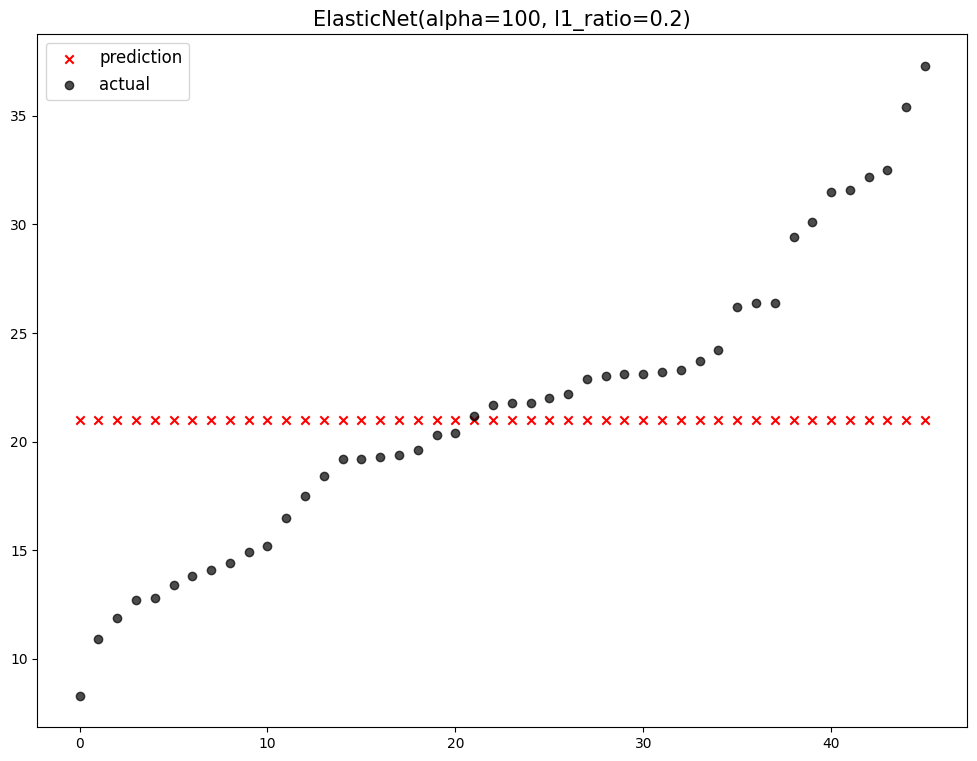


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060


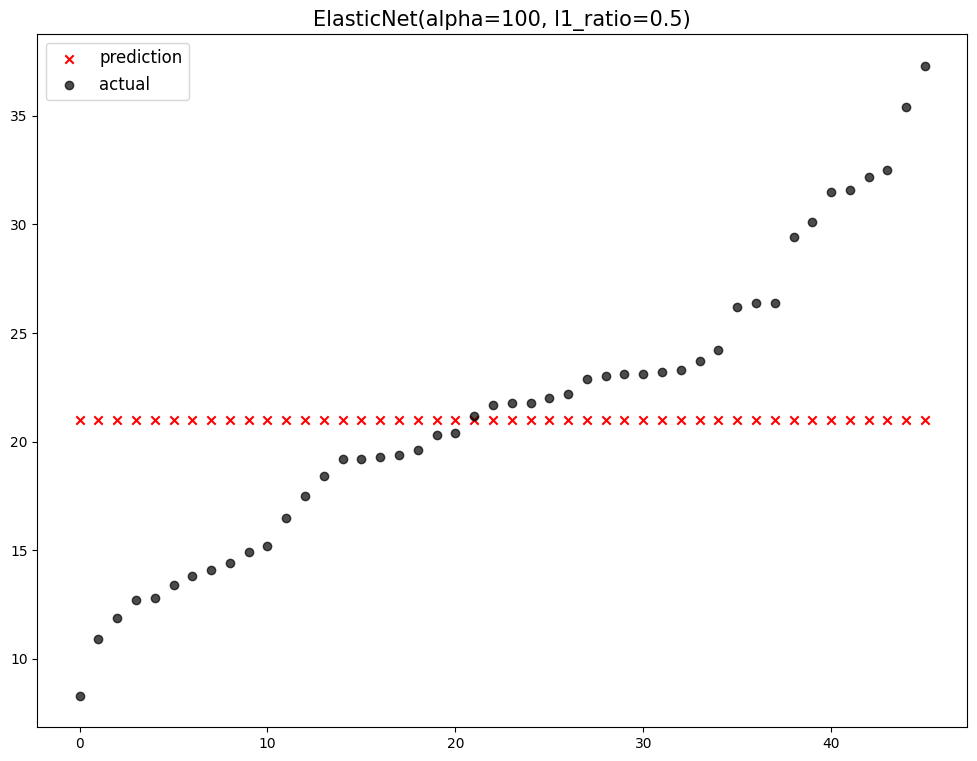


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060


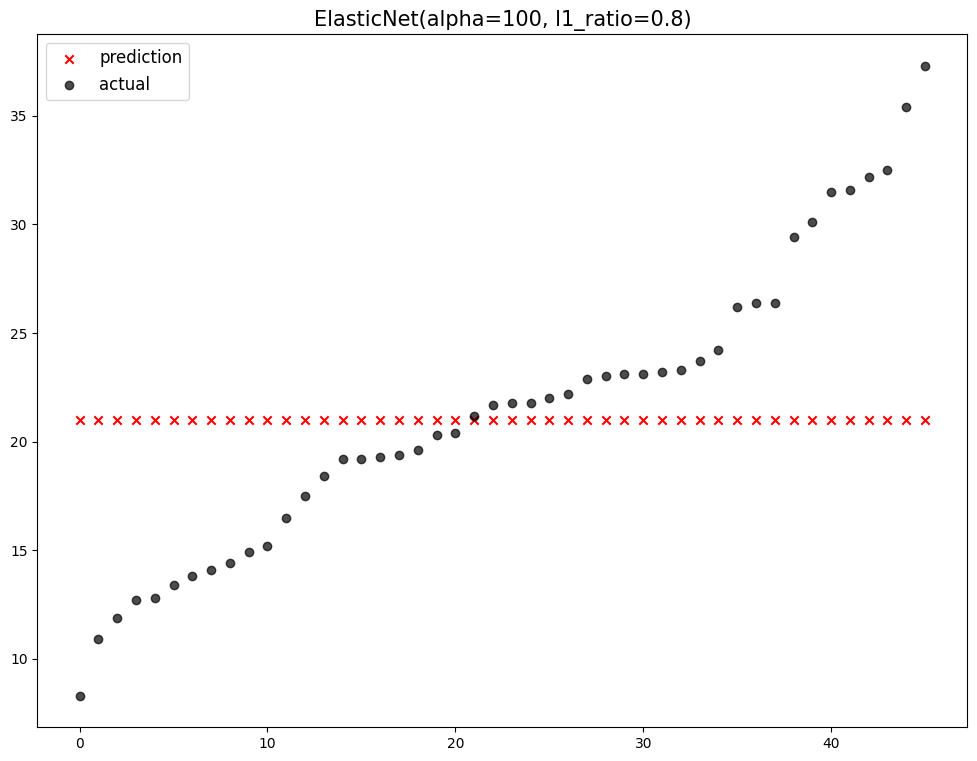


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060


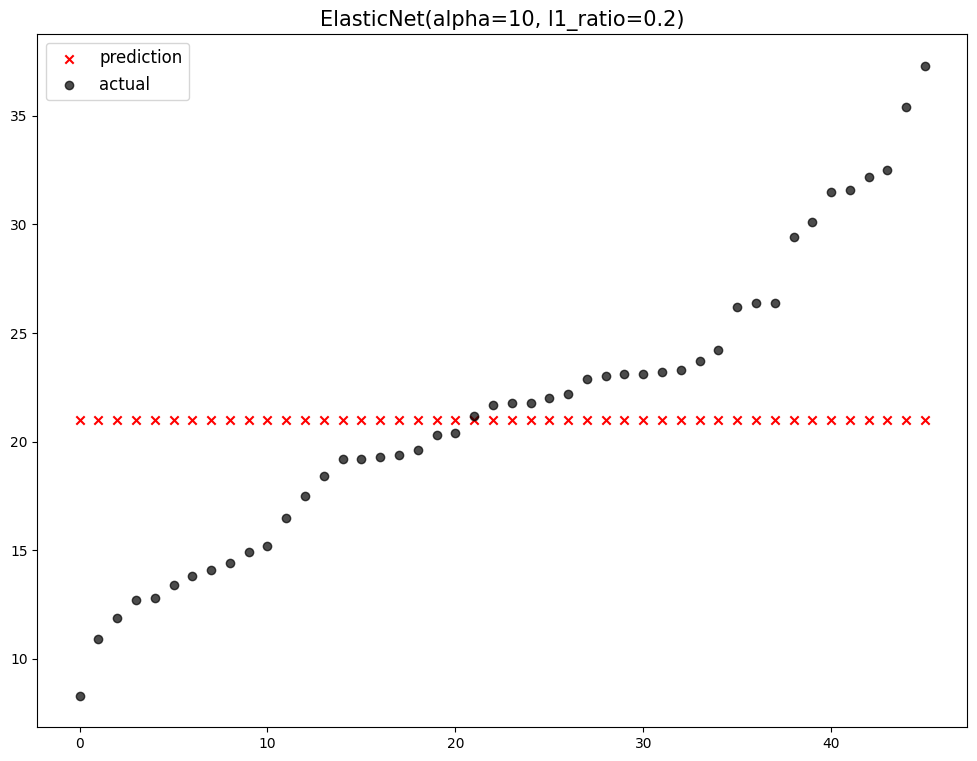


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

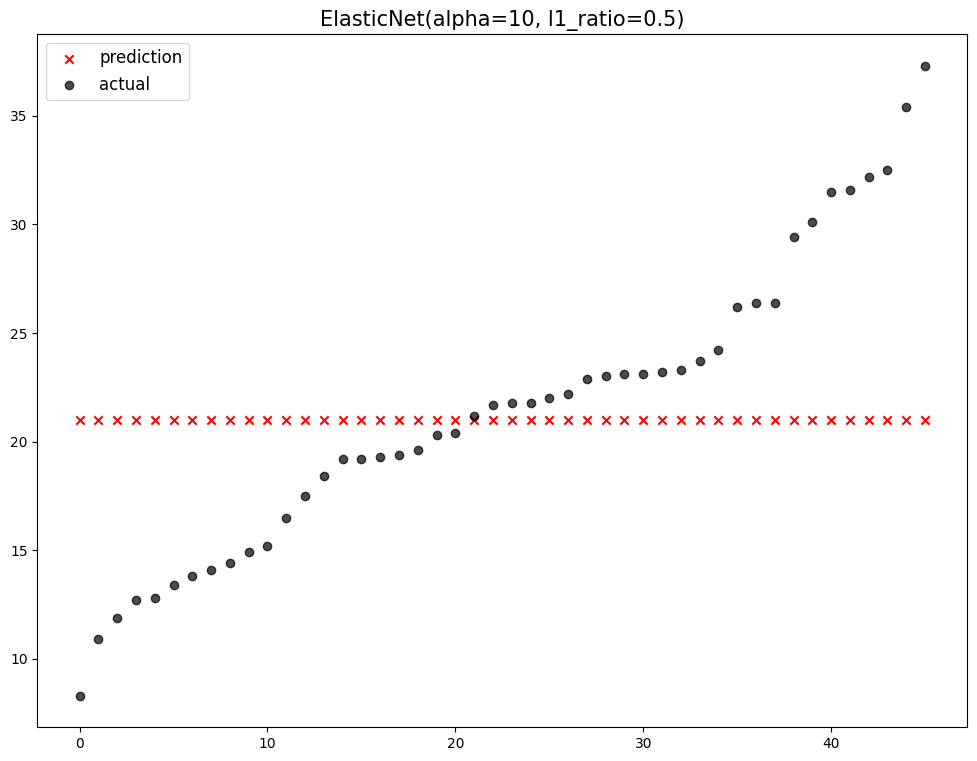


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

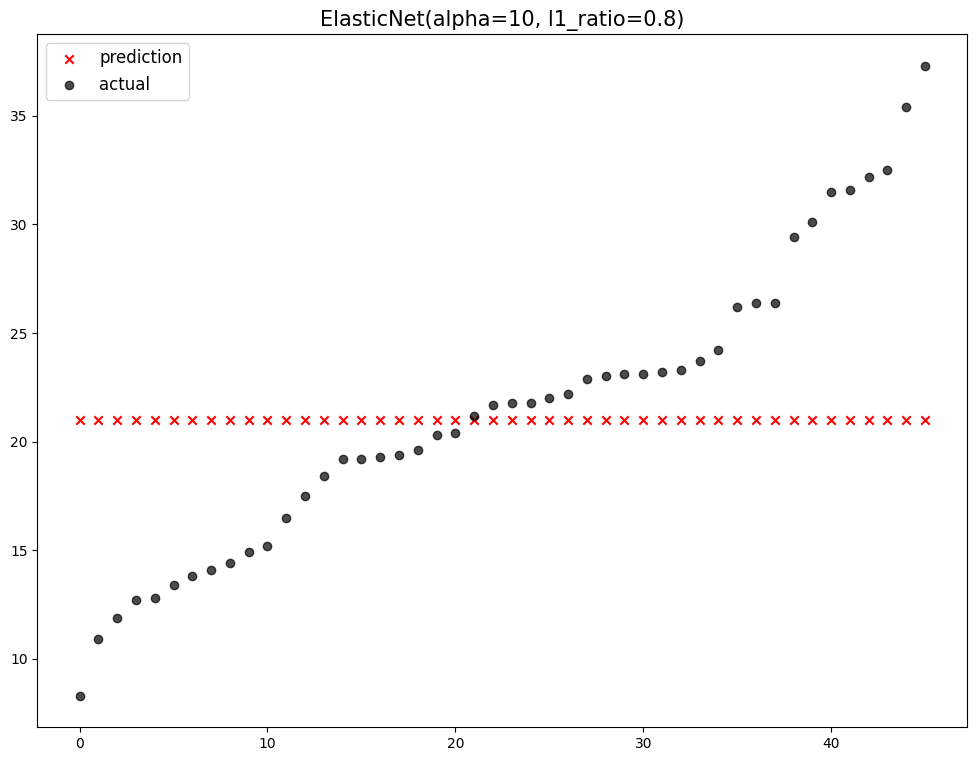


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

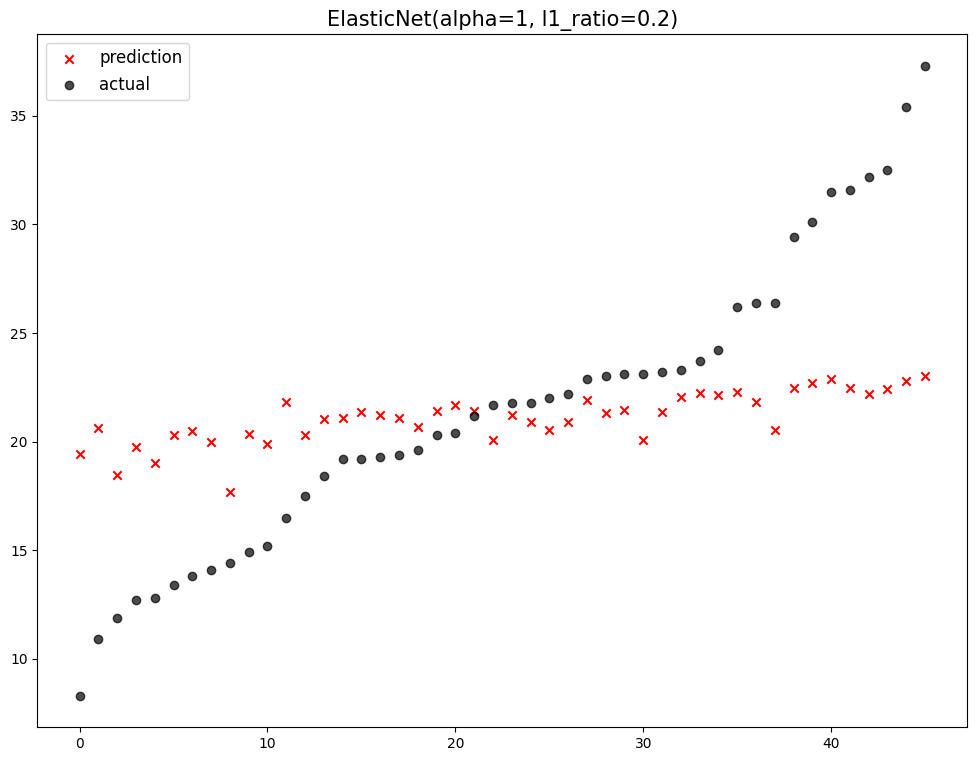


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
13                   Lasso(alpha = 100)  6.673060
14                    Lasso(alpha = 10)  6.673060
15                     Lasso(alpha = 1)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060

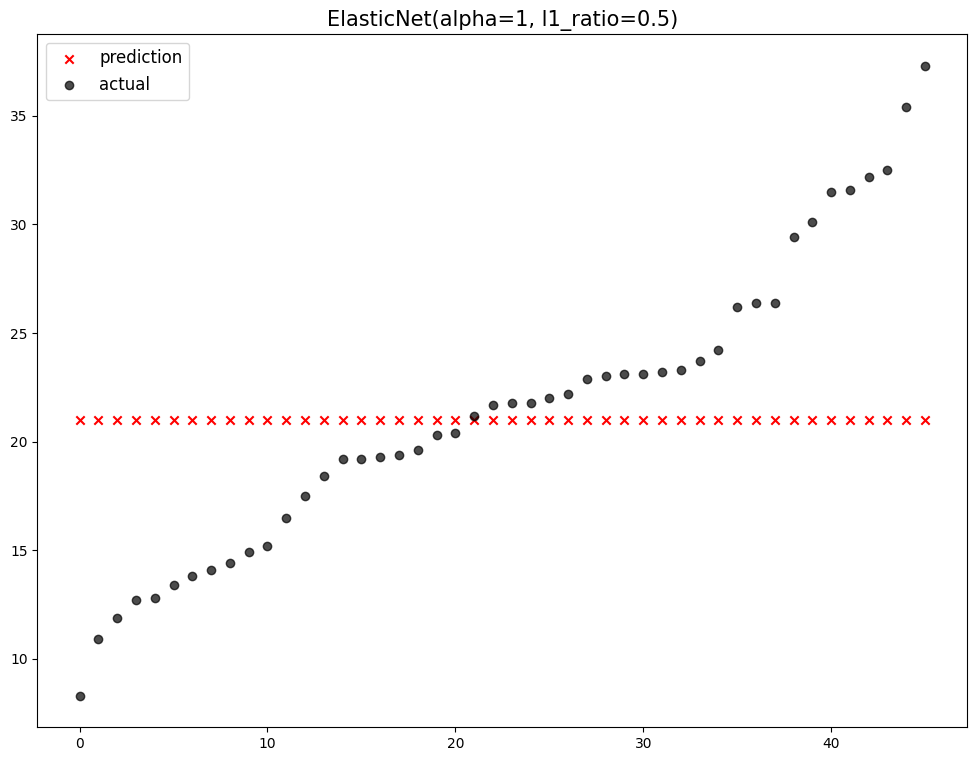


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
13                   Lasso(alpha = 100)  6.673060
14                    Lasso(alpha = 10)  6.673060
15                     Lasso(alpha = 1)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060

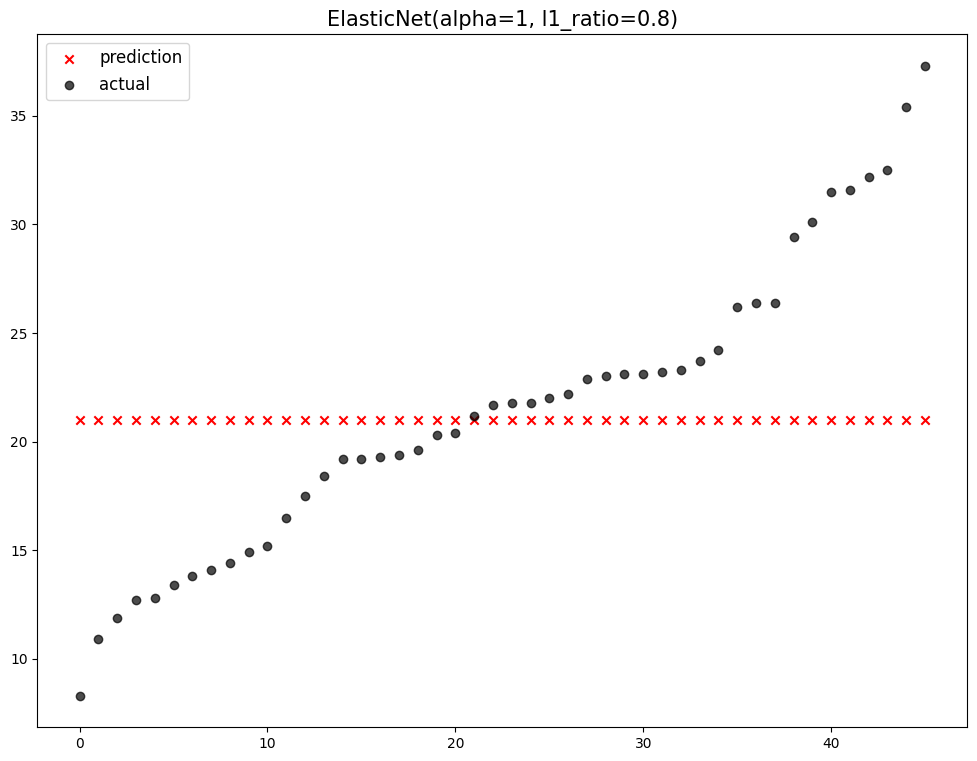


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11                   Lasso(alpha = 0.1)  4.068068
12    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
13                   Lasso(alpha = 100)  6.673060
14                    Lasso(alpha = 10)  6.673060
15                     Lasso(alpha = 1)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060

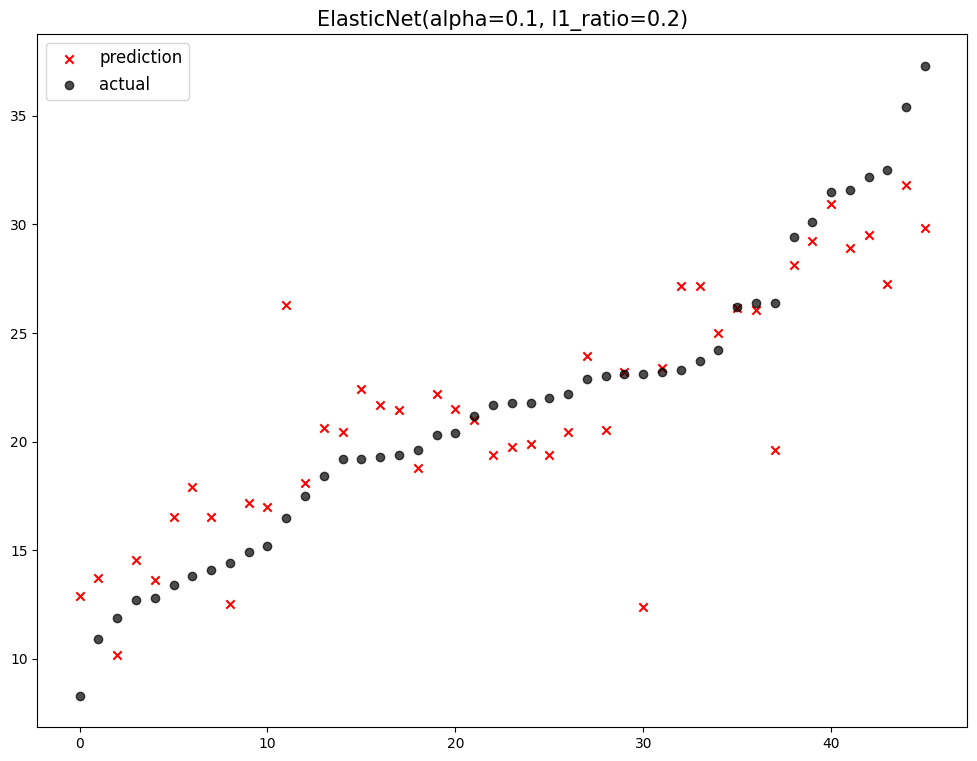


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
12                   Lasso(alpha = 0.1)  4.068068
13    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
14                   Lasso(alpha = 100)  6.673060
15                    Lasso(alpha = 10)  6.673060
16                     Lasso(alpha = 1)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060

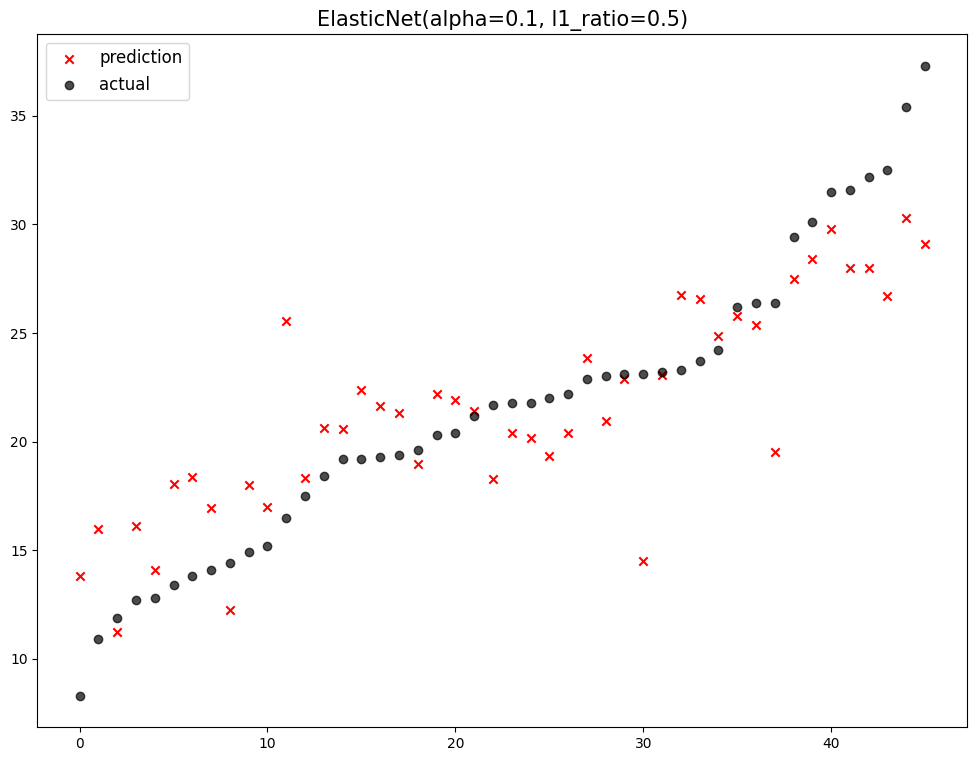


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
13                   Lasso(alpha = 0.1)  4.068068
14    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
15                   Lasso(alpha = 100)  6.673060
16                    Lasso(alpha = 10)  6.673060
17                     Lasso(alpha = 1)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060

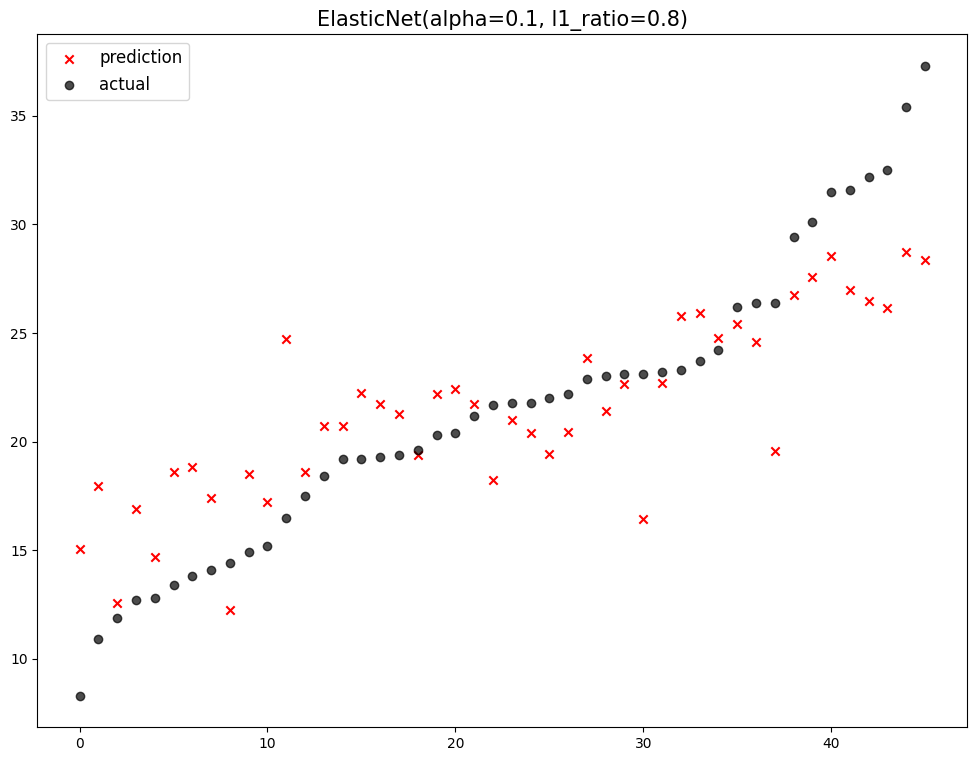


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782958
2                  Ridge(alpha = 0.001)  2.782969
3                   Ridge(alpha = 0.01)  2.783082
4                    Ridge(alpha = 0.1)  2.784208
5                 Lasso(alpha = 0.0001)  2.789500
6                      Ridge(alpha = 1)  2.795203
7                  Lasso(alpha = 0.001)  2.855572
8                     Ridge(alpha = 10)  2.883008
9                    Ridge(alpha = 100)  3.151137
10                  Lasso(alpha = 0.01)  3.300670
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
13  ElasticNet(alpha=0.1, l1_ratio=0.8)  3.845138
14                   Lasso(alpha = 0.1)  4.068068
15    ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
16                   Lasso(alpha = 100)  6.673060
17                    Lasso(alpha = 10)  6.673060
18                     Lasso(alpha = 1)  6.673060

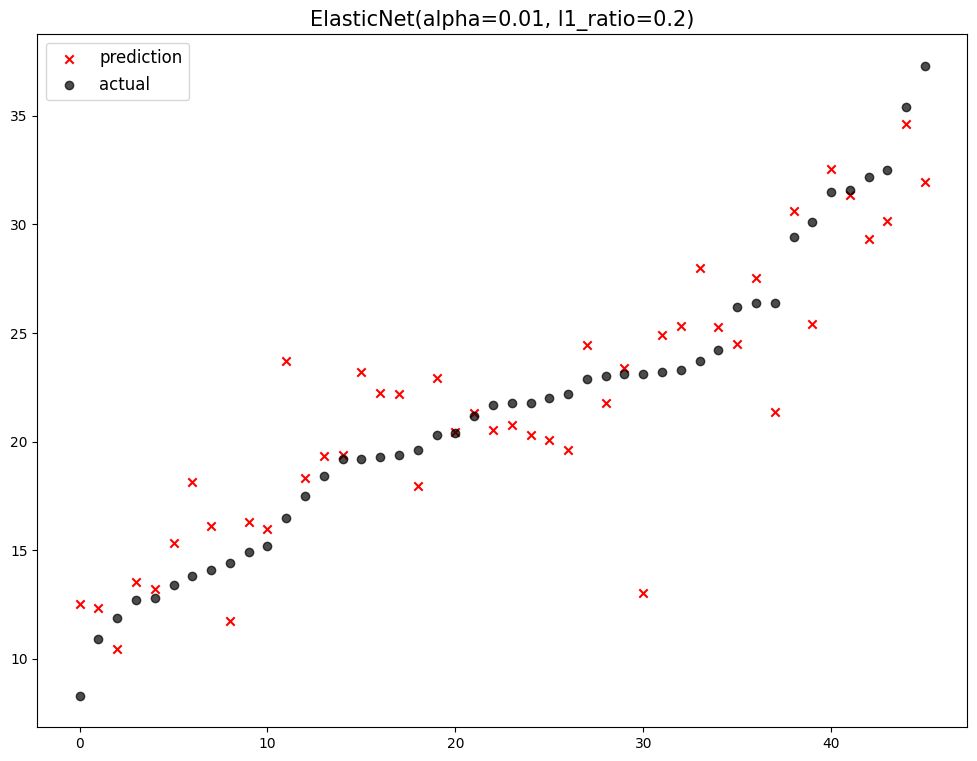


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782958
2                   Ridge(alpha = 0.001)  2.782969
3                    Ridge(alpha = 0.01)  2.783082
4                     Ridge(alpha = 0.1)  2.784208
5                  Lasso(alpha = 0.0001)  2.789500
6                       Ridge(alpha = 1)  2.795203
7                   Lasso(alpha = 0.001)  2.855572
8                      Ridge(alpha = 10)  2.883008
9   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
10                    Ridge(alpha = 100)  3.151137
11                   Lasso(alpha = 0.01)  3.300670
12   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
13   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
14   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.845138
15                    Lasso(alpha = 0.1)  4.068068
16     ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
17                    Lasso(alpha = 100)  6.673060
18                     Lasso(a

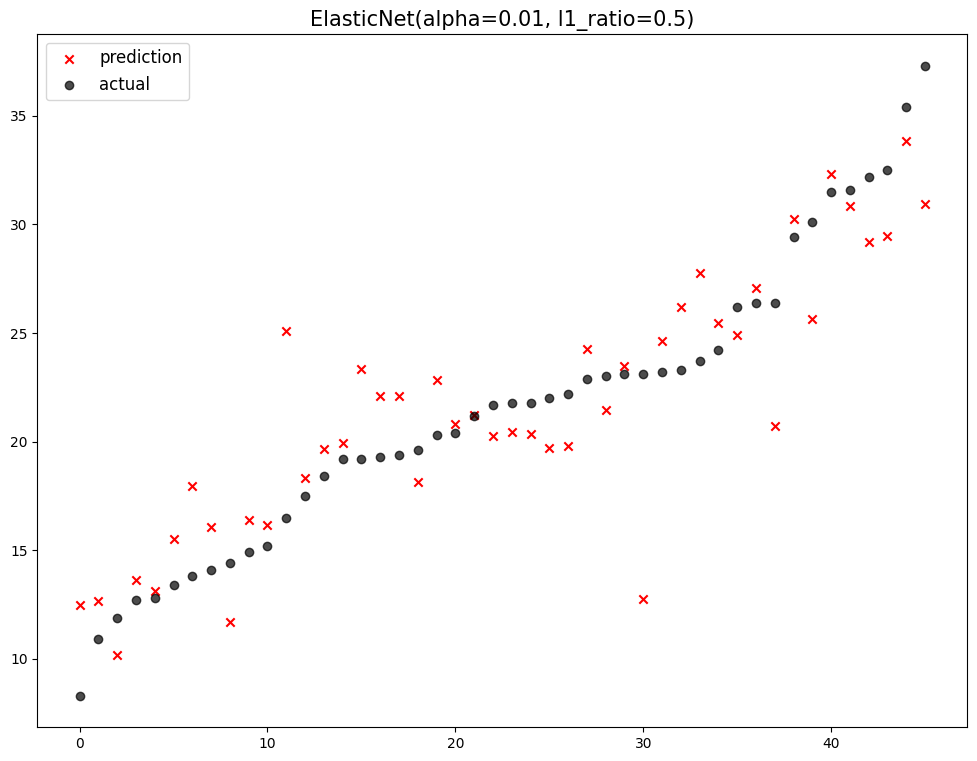


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782958
2                   Ridge(alpha = 0.001)  2.782969
3                    Ridge(alpha = 0.01)  2.783082
4                     Ridge(alpha = 0.1)  2.784208
5                  Lasso(alpha = 0.0001)  2.789500
6                       Ridge(alpha = 1)  2.795203
7                   Lasso(alpha = 0.001)  2.855572
8                      Ridge(alpha = 10)  2.883008
9   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
10  ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
11                    Ridge(alpha = 100)  3.151137
12                   Lasso(alpha = 0.01)  3.300670
13   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
14   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
15   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.845138
16                    Lasso(alpha = 0.1)  4.068068
17     ElasticNet(alpha=1, l1_ratio=0.2)  5.771115
18                    Lasso(al

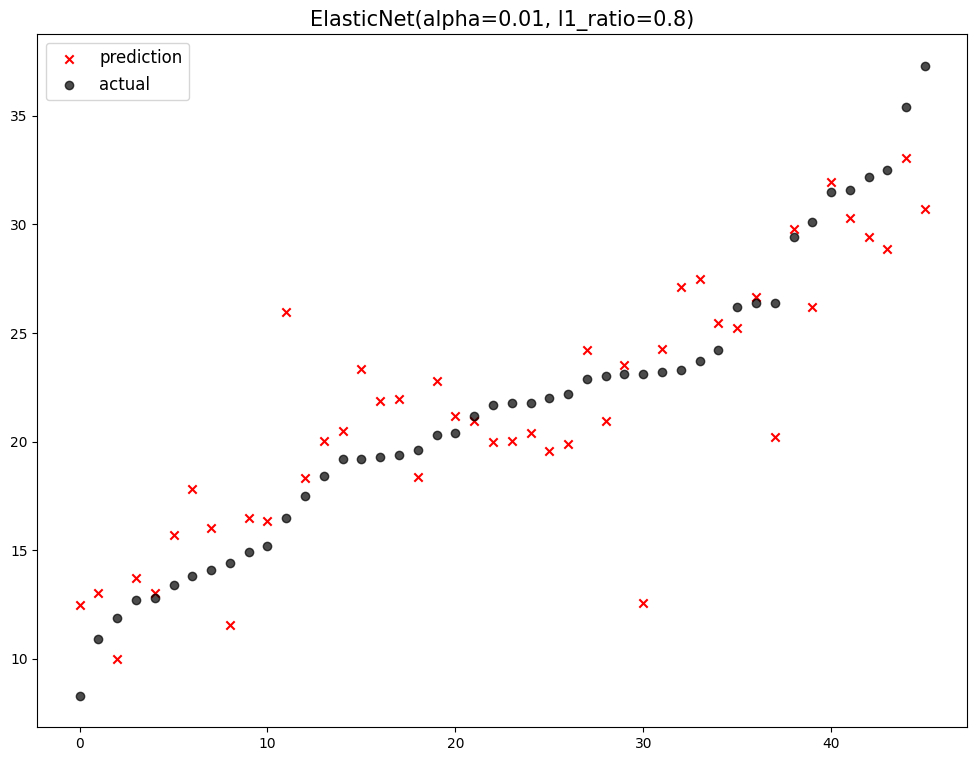


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782958
2                   Ridge(alpha = 0.001)  2.782969
3                    Ridge(alpha = 0.01)  2.783082
4                     Ridge(alpha = 0.1)  2.784208
5                  Lasso(alpha = 0.0001)  2.789500
6                       Ridge(alpha = 1)  2.795203
7                   Lasso(alpha = 0.001)  2.855572
8                      Ridge(alpha = 10)  2.883008
9   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
10  ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
11                    Ridge(alpha = 100)  3.151137
12  ElasticNet(alpha=0.01, l1_ratio=0.8)  3.269007
13                   Lasso(alpha = 0.01)  3.300670
14   ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
15   ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
16   ElasticNet(alpha=0.1, l1_ratio=0.8)  3.845138
17                    Lasso(alpha = 0.1)  4.068068
18     ElasticNet(alpha=1, l1_

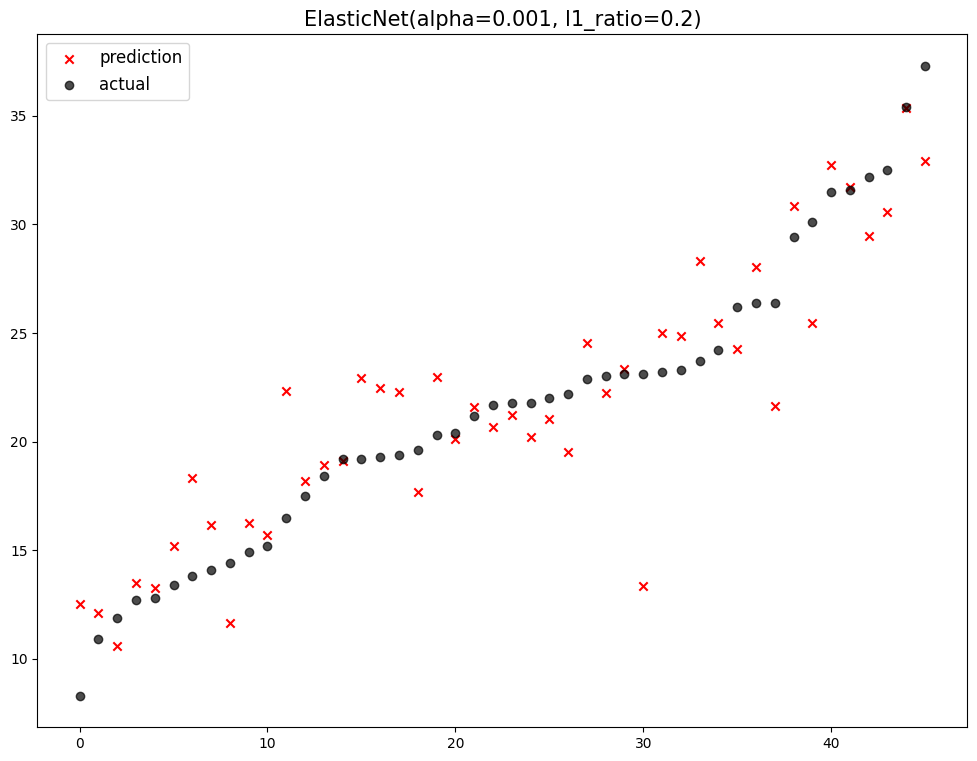


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782958
2                    Ridge(alpha = 0.001)  2.782969
3                     Ridge(alpha = 0.01)  2.783082
4                      Ridge(alpha = 0.1)  2.784208
5                   Lasso(alpha = 0.0001)  2.789500
6                        Ridge(alpha = 1)  2.795203
7   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
8                    Lasso(alpha = 0.001)  2.855572
9                       Ridge(alpha = 10)  2.883008
10   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
11   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
12                     Ridge(alpha = 100)  3.151137
13   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.269007
14                    Lasso(alpha = 0.01)  3.300670
15    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
16    ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
17    ElasticNet(alpha=0.1, l1_ratio=0.8)  3.845138
18         

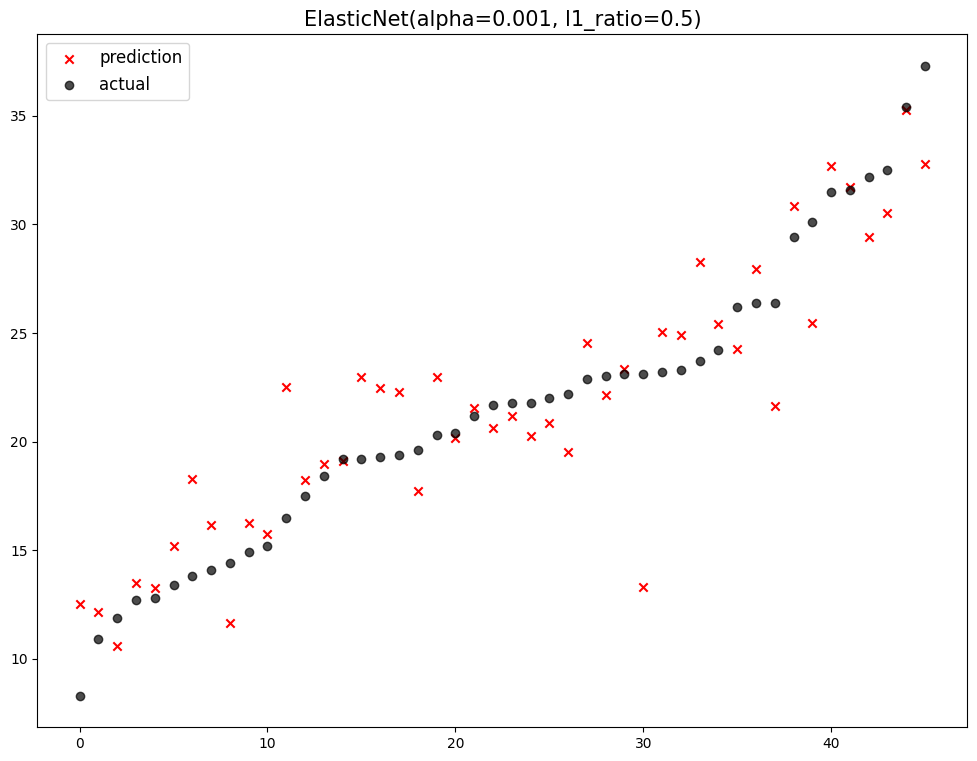


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782958
2                    Ridge(alpha = 0.001)  2.782969
3                     Ridge(alpha = 0.01)  2.783082
4                      Ridge(alpha = 0.1)  2.784208
5                   Lasso(alpha = 0.0001)  2.789500
6                        Ridge(alpha = 1)  2.795203
7   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
8   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
9                    Lasso(alpha = 0.001)  2.855572
10                      Ridge(alpha = 10)  2.883008
11   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
12   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
13                     Ridge(alpha = 100)  3.151137
14   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.269007
15                    Lasso(alpha = 0.01)  3.300670
16    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
17    ElasticNet(alpha=0.1, l1_ratio=0.5)  3.598807
18    Elast

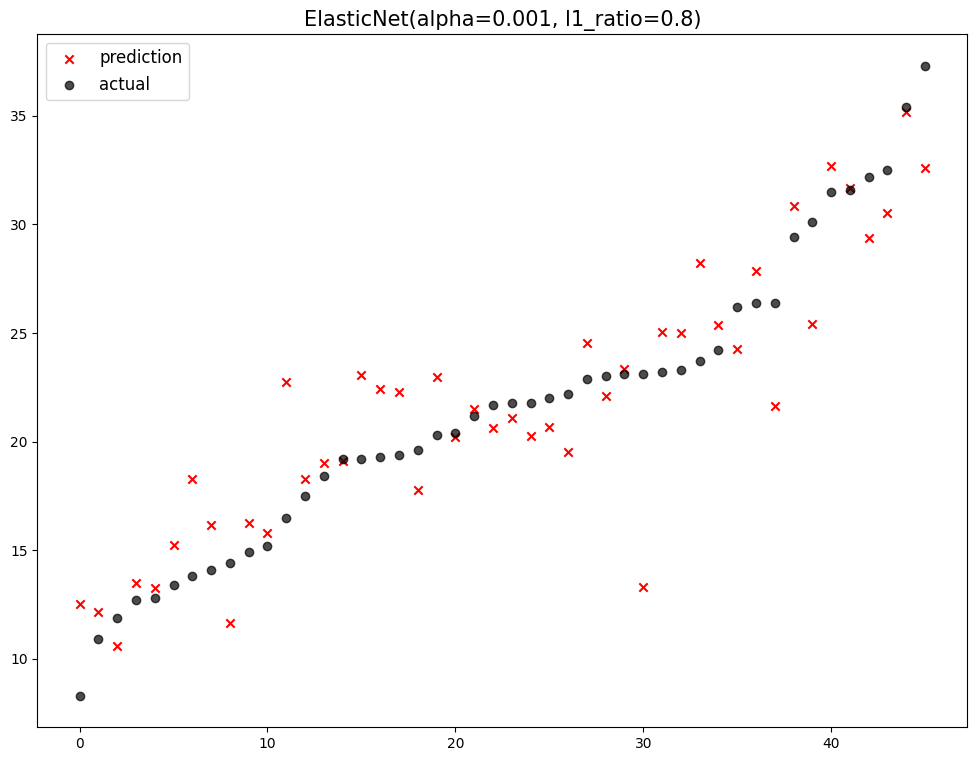


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782958
2                    Ridge(alpha = 0.001)  2.782969
3                     Ridge(alpha = 0.01)  2.783082
4                      Ridge(alpha = 0.1)  2.784208
5                   Lasso(alpha = 0.0001)  2.789500
6                        Ridge(alpha = 1)  2.795203
7   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
8   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
9   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
10                   Lasso(alpha = 0.001)  2.855572
11                      Ridge(alpha = 10)  2.883008
12   ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
13   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
14                     Ridge(alpha = 100)  3.151137
15   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.269007
16                    Lasso(alpha = 0.01)  3.300670
17    ElasticNet(alpha=0.1, l1_ratio=0.2)  3.428137
18    Elast

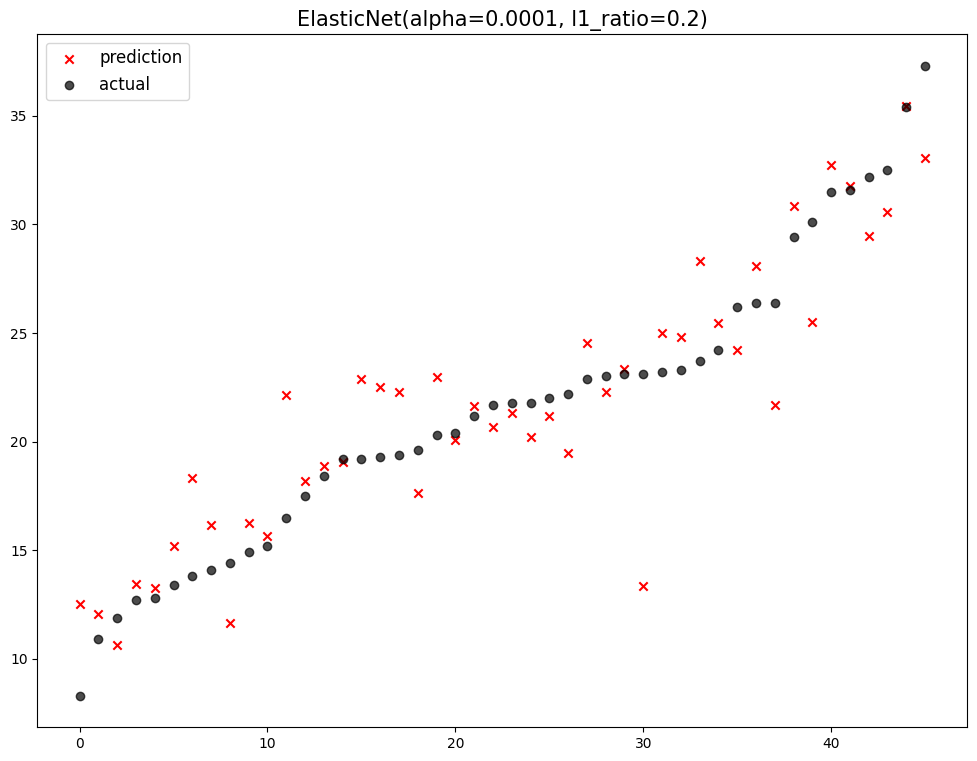


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782958
2                     Ridge(alpha = 0.001)  2.782969
3                      Ridge(alpha = 0.01)  2.783082
4                       Ridge(alpha = 0.1)  2.784208
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
6                    Lasso(alpha = 0.0001)  2.789500
7                         Ridge(alpha = 1)  2.795203
8    ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
9    ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
10   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
11                    Lasso(alpha = 0.001)  2.855572
12                       Ridge(alpha = 10)  2.883008
13    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
14    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
15                      Ridge(alpha = 100)  3.151137
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.269007
17                     Lasso(alpha = 0.01)  3

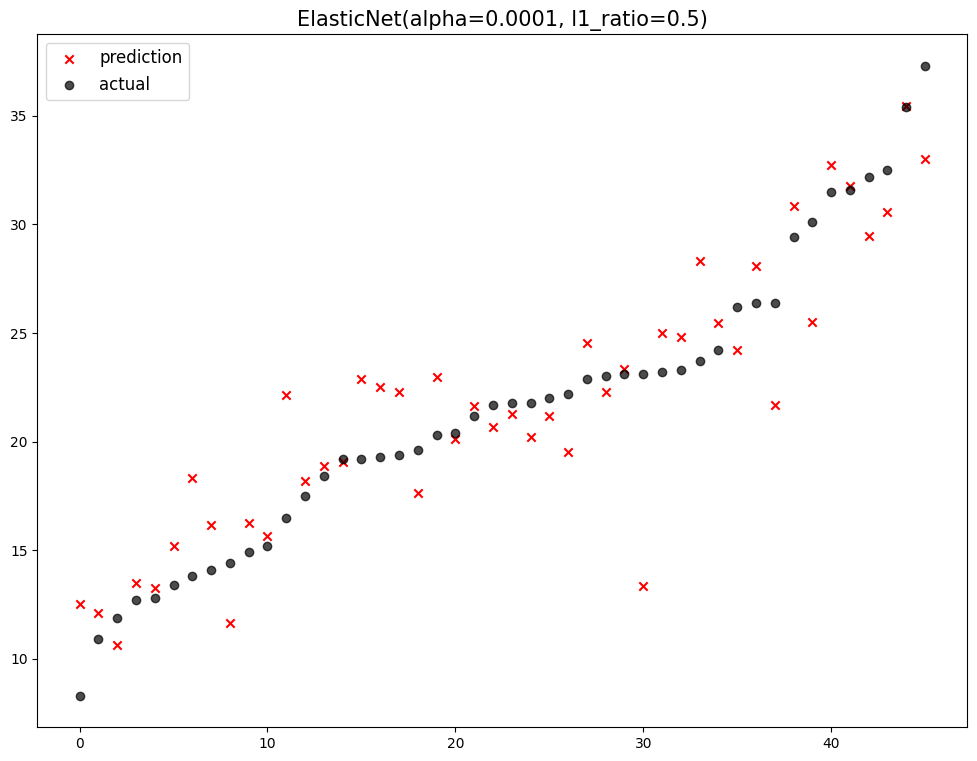


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782958
2                     Ridge(alpha = 0.001)  2.782969
3                      Ridge(alpha = 0.01)  2.783082
4                       Ridge(alpha = 0.1)  2.784208
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
6   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
7                    Lasso(alpha = 0.0001)  2.789500
8                         Ridge(alpha = 1)  2.795203
9    ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
10   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
12                    Lasso(alpha = 0.001)  2.855572
13                       Ridge(alpha = 10)  2.883008
14    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
15    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
16                      Ridge(alpha = 100)  3.151137
17    ElasticNet(alpha=0.01, l1_ratio=0.8)  3

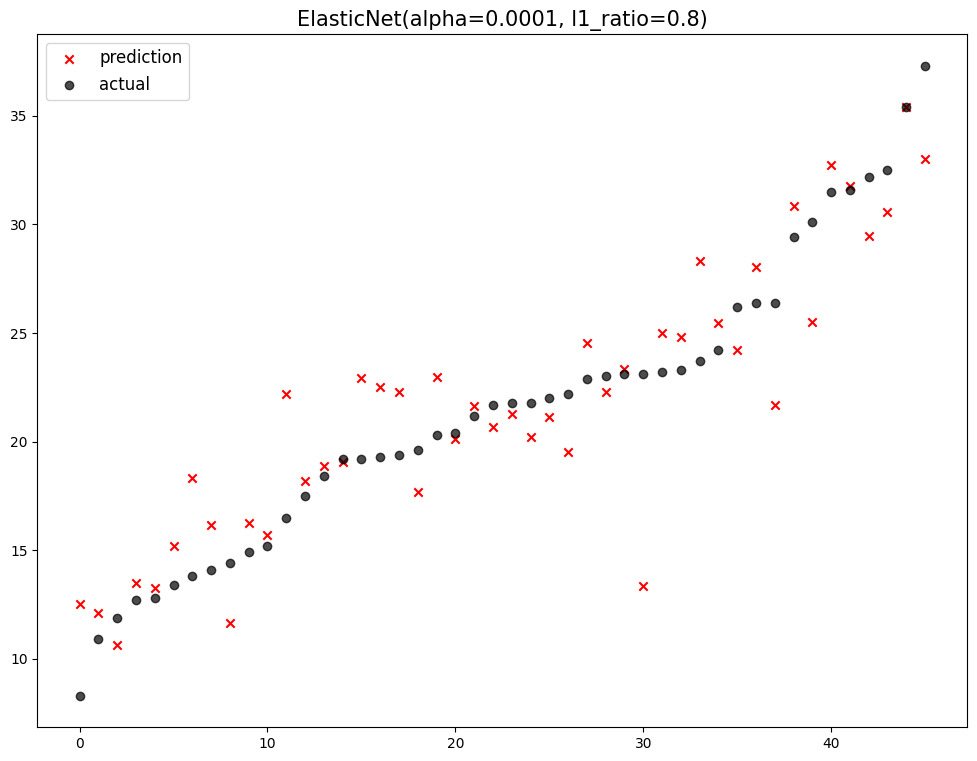


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782958
2                     Ridge(alpha = 0.001)  2.782969
3                      Ridge(alpha = 0.01)  2.783082
4                       Ridge(alpha = 0.1)  2.784208
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
6   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
7   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
8                    Lasso(alpha = 0.0001)  2.789500
9                         Ridge(alpha = 1)  2.795203
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
11   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
12   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
13                    Lasso(alpha = 0.001)  2.855572
14                       Ridge(alpha = 10)  2.883008
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
16    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.138959
17                      Ridge(alpha = 100)  3

In [33]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        elasticnet = ElasticNet(alpha = alpha, l1_ratio = ratio) # 모델 객체 생성
        elasticnet.fit(scaled_X_train, scaled_y_train) # 학습
        pred = np.expm1(elasticnet.predict(scaled_X_valid)) # 예측
        rmse_eval('ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), pred, y_valid) # 평가

### **5-6. 다항 회귀**

In [34]:
poly = PolynomialFeatures(degree = 2,include_bias = False) # 두 개의 기울기 사용, 절편 없음

In [35]:
poly_features = poly.fit_transform(scaled_X_train)

In [36]:
poly_features

array([[-0.40150682,  0.58894173, -0.91279846, ...,  0.19884404,
        -0.45594288,  1.04546214],
       [-0.38841825, -0.49893275, -0.61389402, ...,  0.17578489,
        -0.30388443,  0.52533383],
       [-0.36829996, -0.49893275, -0.5453647 , ...,  0.19884404,
        -0.40469871,  0.82366586],
       ...,
       [ 1.25709513, -0.49893275,  1.01768685, ...,  0.00519142,
        -0.12205655,  2.86969677],
       [-0.39804067,  2.11196599, -1.37500681, ...,  0.15681679,
        -0.26783122,  0.45743546],
       [ 0.10837069, -0.49893275,  1.01768685, ...,  0.041294  ,
        -0.02855437,  0.01974505]])

#### **a) LinearRegression**

In [37]:
### 모델 생성

poly_linear = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    LinearRegression(n_jobs = -1)
)

In [38]:
### 모델 학습 & 예측

poly_lin_pred = poly_linear.fit(scaled_X_train, scaled_y_train).predict(scaled_X_valid)
poly_lin_pred = np.expm1(poly_lin_pred)

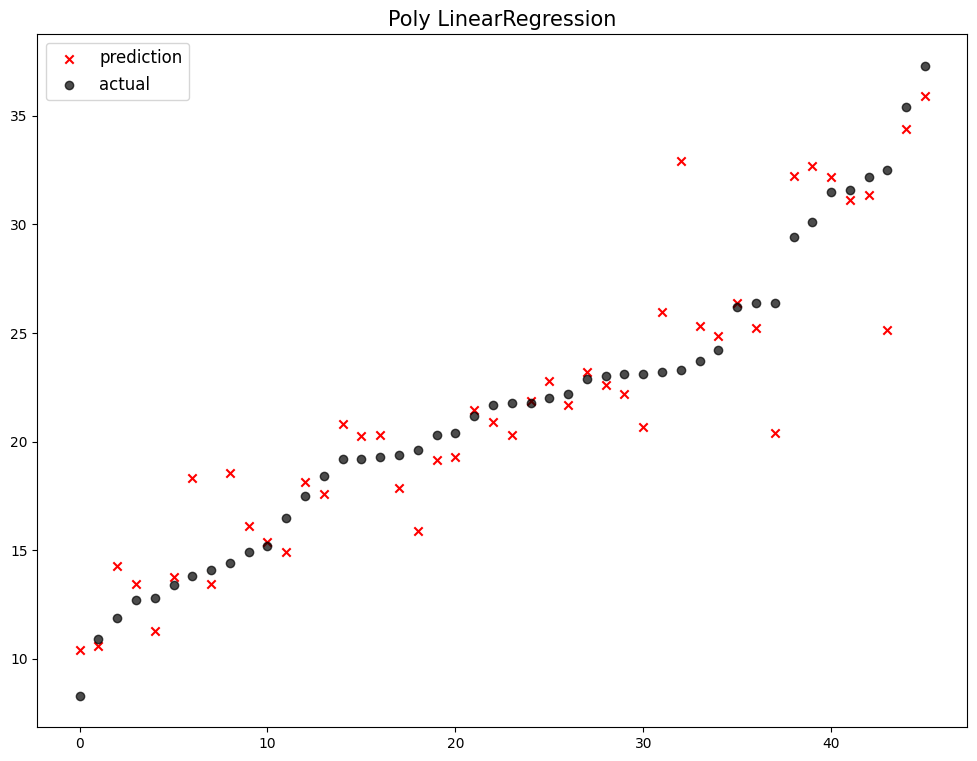


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

In [39]:
### 평가 & 시각화

rmse_eval('Poly LinearRegression',poly_lin_pred,y_valid)

#### **b) Lasso**

In [40]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

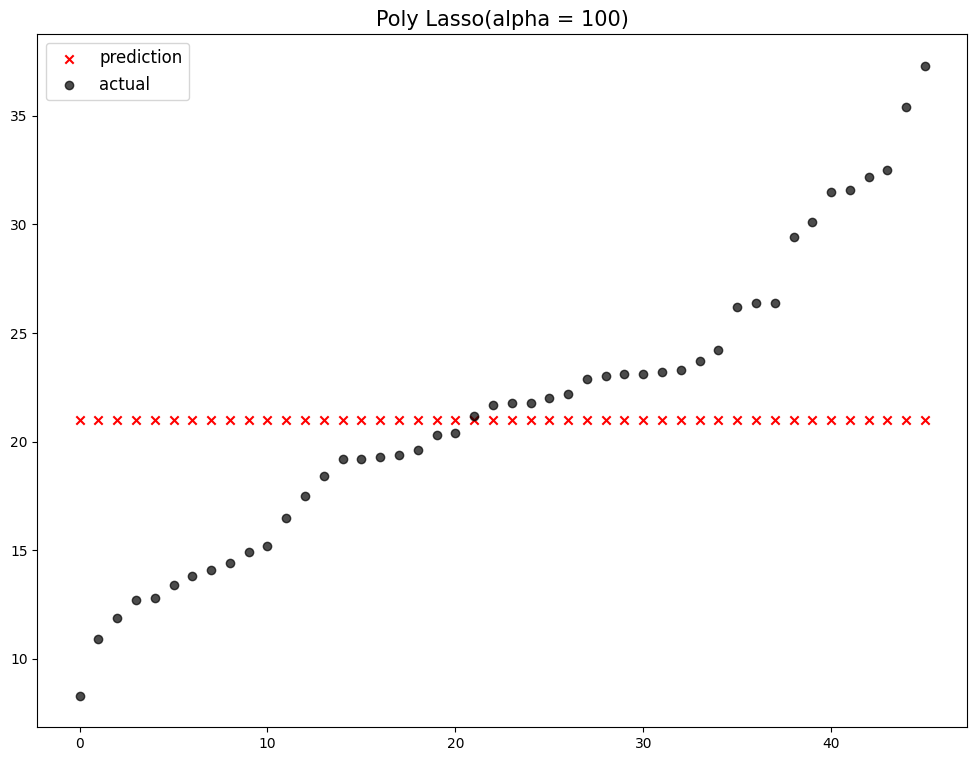


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

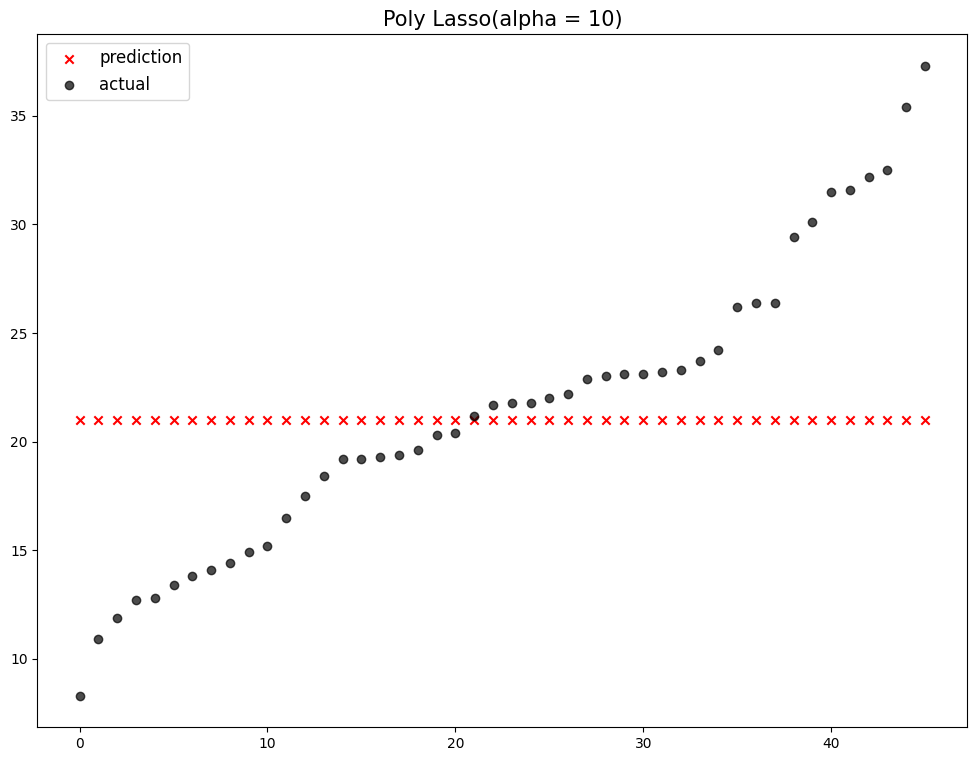


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

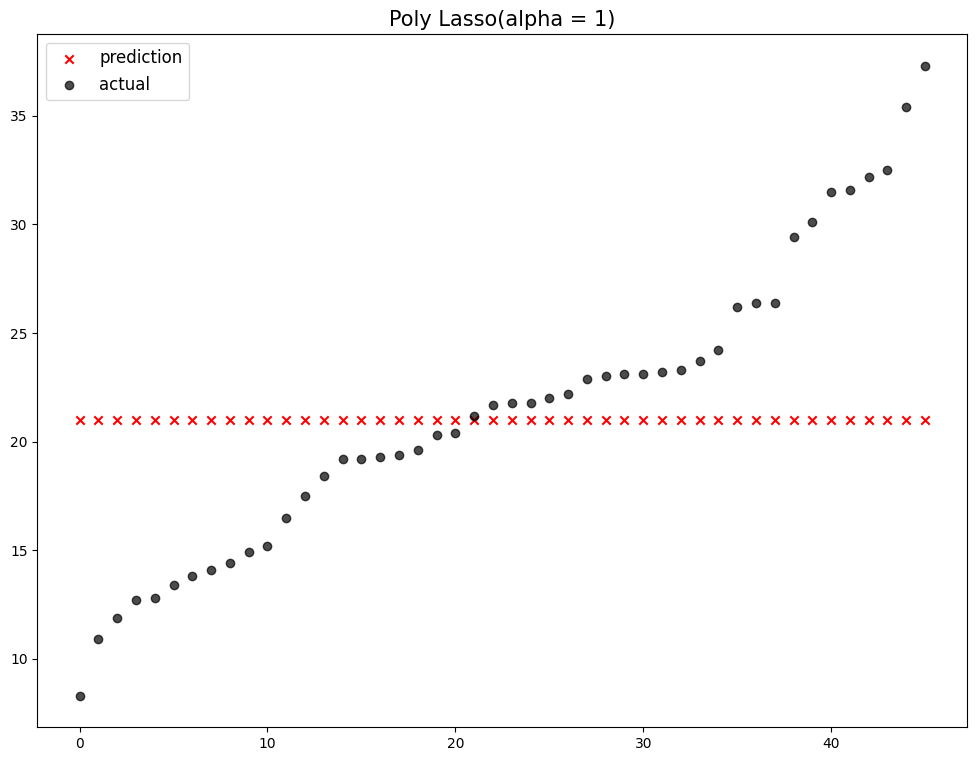


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

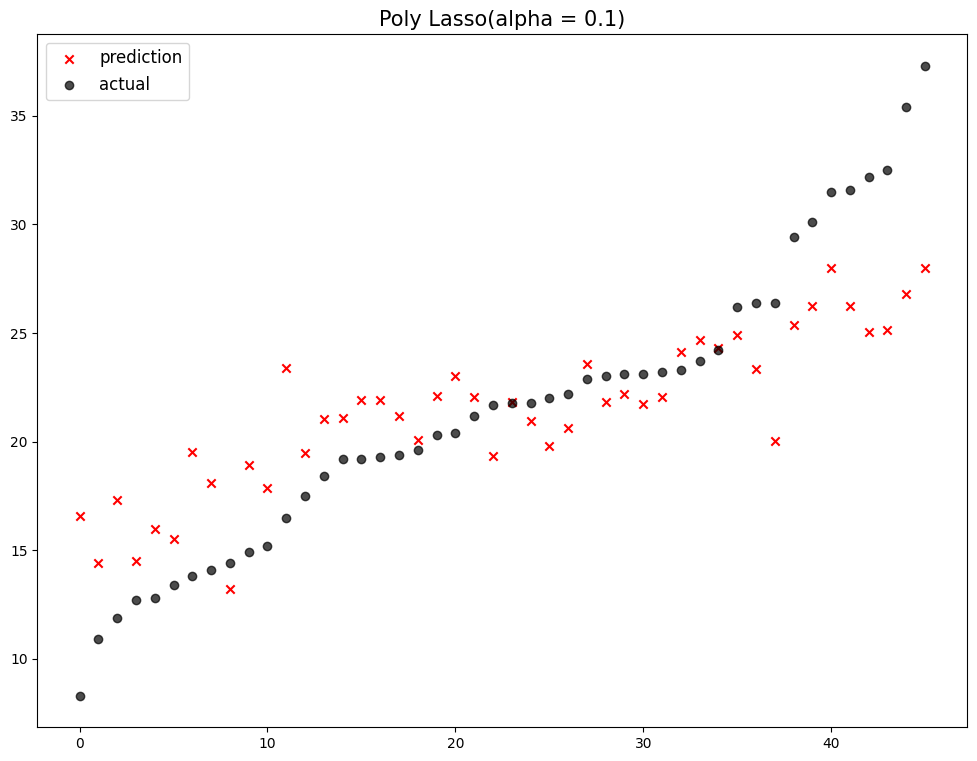


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

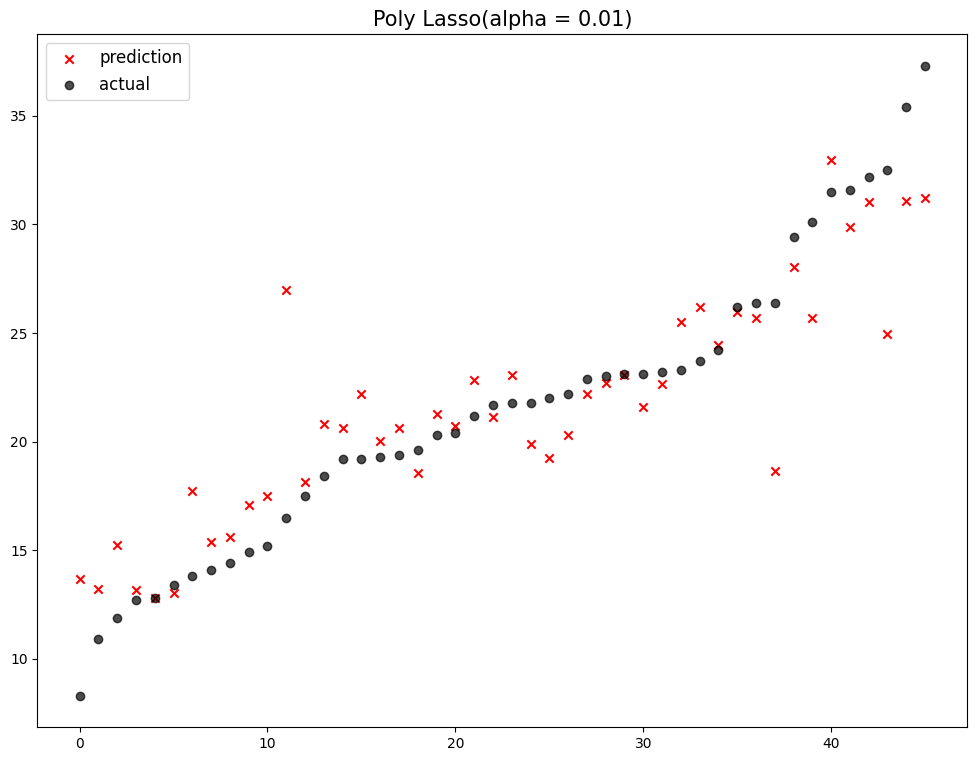


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782958
3                     Ridge(alpha = 0.001)  2.782969
4                      Ridge(alpha = 0.01)  2.783082
5                       Ridge(alpha = 0.1)  2.784208
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
9                    Lasso(alpha = 0.0001)  2.789500
10                        Ridge(alpha = 1)  2.795203
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
14                    Lasso(alpha = 0.001)  2.855572
15                       Ridge(alpha = 10)  2.883008
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  2.944443
17                Poly Lasso(alpha = 0.01)  3

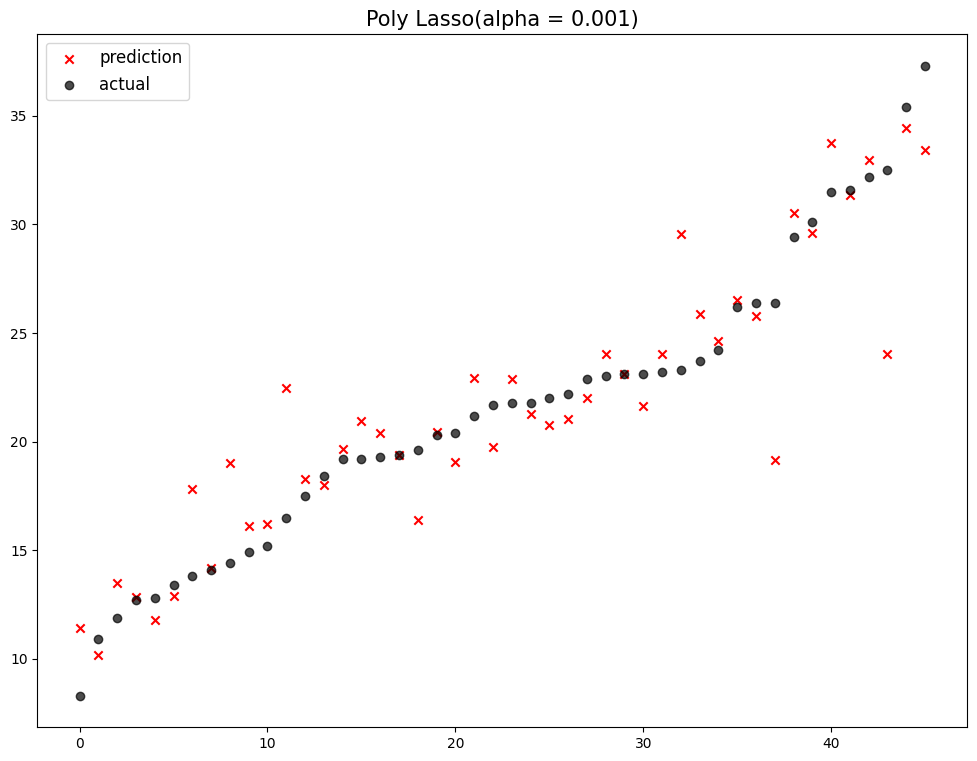


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2                         LinearRegression  2.782956
3                    Ridge(alpha = 0.0001)  2.782958
4                     Ridge(alpha = 0.001)  2.782969
5                      Ridge(alpha = 0.01)  2.783082
6                       Ridge(alpha = 0.1)  2.784208
7   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
8   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
9   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
10                   Lasso(alpha = 0.0001)  2.789500
11                        Ridge(alpha = 1)  2.795203
12   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
13   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
14   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
15                    Lasso(alpha = 0.001)  2.855572
16                       Ridge(alpha = 10)  2.883008
17    ElasticNet(alpha=0.01, l1_ratio=0.2)  2

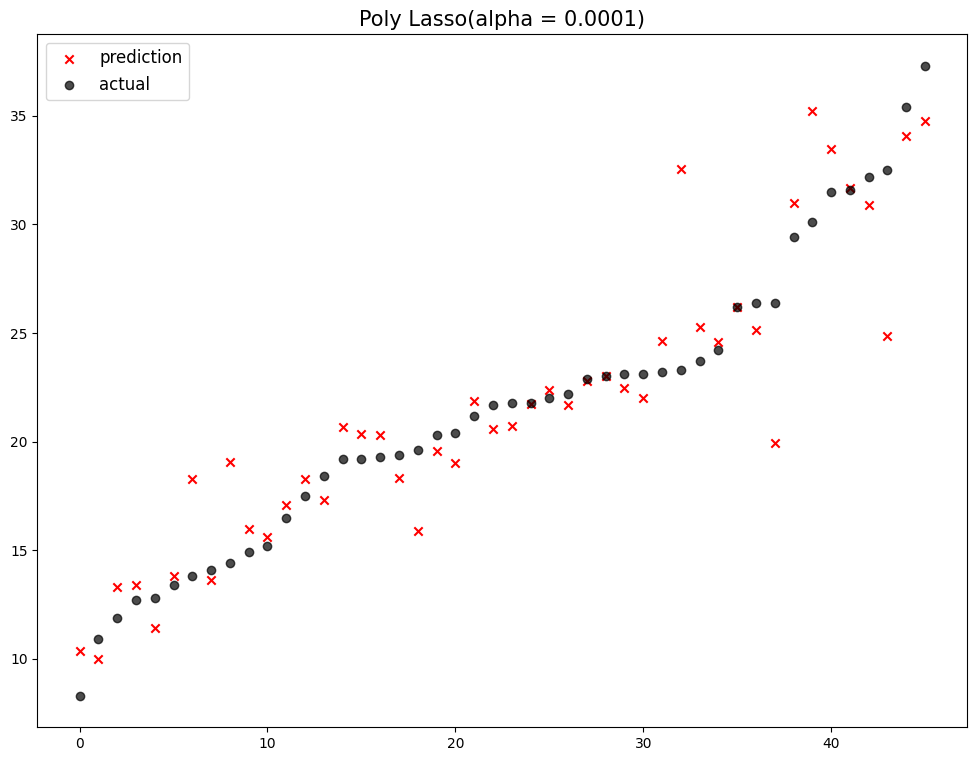


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2               Poly Lasso(alpha = 0.0001)  2.620152
3                         LinearRegression  2.782956
4                    Ridge(alpha = 0.0001)  2.782958
5                     Ridge(alpha = 0.001)  2.782969
6                      Ridge(alpha = 0.01)  2.783082
7                       Ridge(alpha = 0.1)  2.784208
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
9   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
10  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
11                   Lasso(alpha = 0.0001)  2.789500
12                        Ridge(alpha = 1)  2.795203
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
14   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
15   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
16                    Lasso(alpha = 0.001)  2.855572
17                       Ridge(alpha = 10)  2

In [41]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_lasso = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Lasso(alpha = alpha)
    )
    poly_lasso.fit(scaled_X_train, scaled_y_train) # 학습
    poly_lasso_pred = np.expm1(poly_lasso.predict(scaled_X_valid)) # 예측
    rmse_eval('Poly Lasso(alpha = {})'.format(alpha),poly_lasso_pred,y_valid) # 평가 & 시각화

#### **c) Ridge**

In [42]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

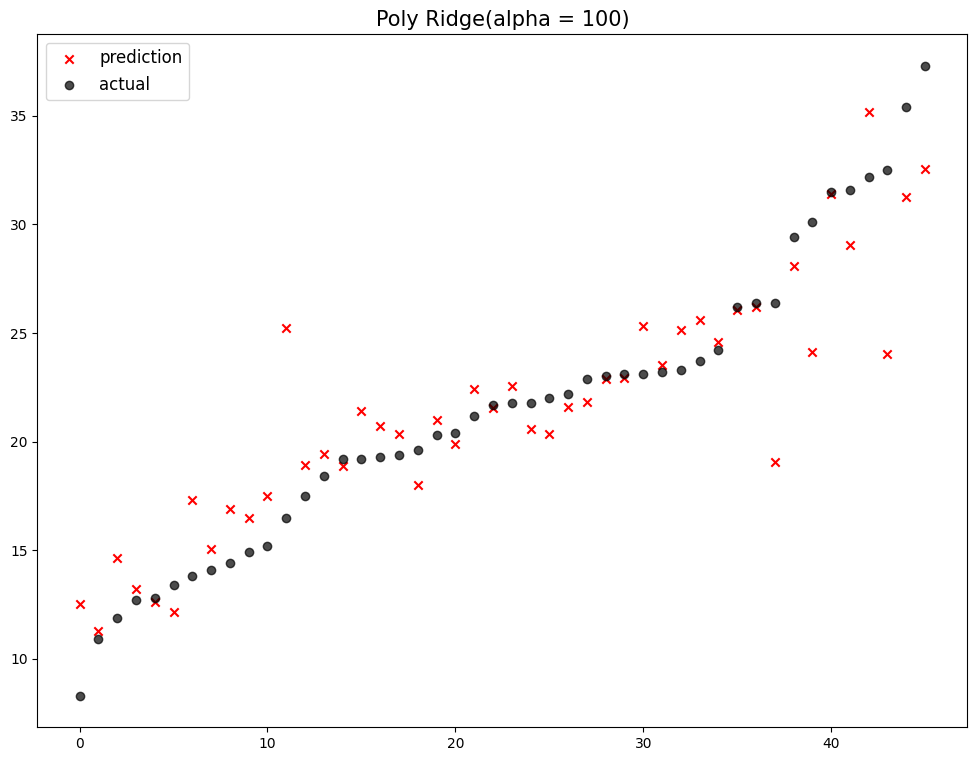


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2               Poly Lasso(alpha = 0.0001)  2.620152
3                         LinearRegression  2.782956
4                    Ridge(alpha = 0.0001)  2.782958
5                     Ridge(alpha = 0.001)  2.782969
6                      Ridge(alpha = 0.01)  2.783082
7                       Ridge(alpha = 0.1)  2.784208
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
9   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
10  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
11                   Lasso(alpha = 0.0001)  2.789500
12                        Ridge(alpha = 1)  2.795203
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
14   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
15   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
16                    Lasso(alpha = 0.001)  2.855572
17                       Ridge(alpha = 10)  2

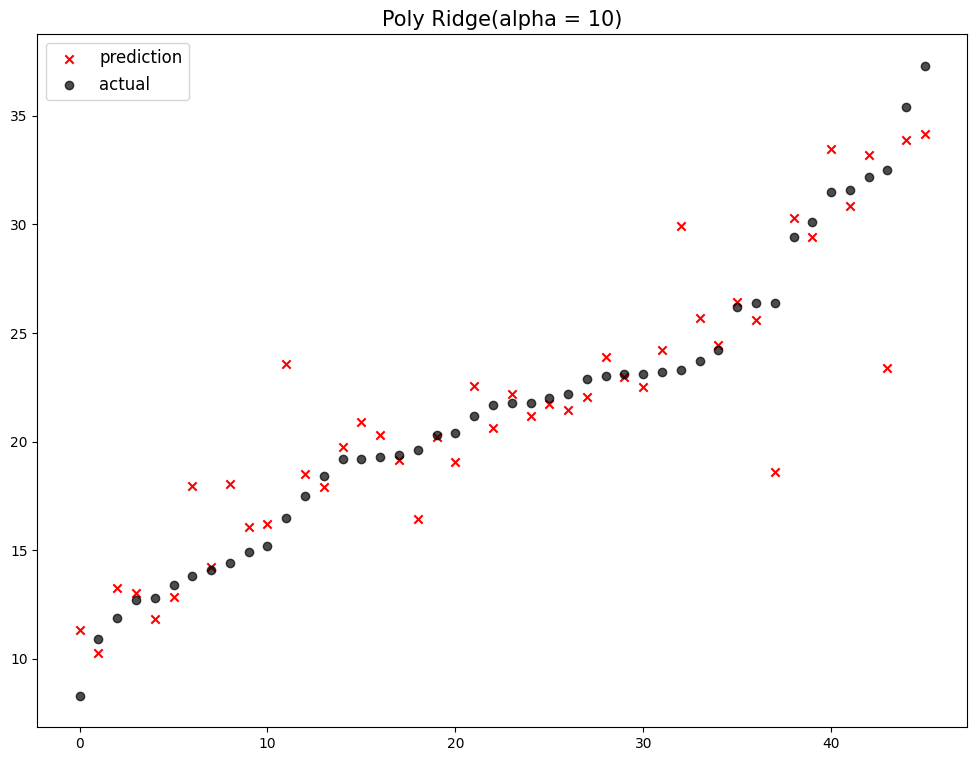


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2               Poly Lasso(alpha = 0.0001)  2.620152
3                   Poly Ridge(alpha = 10)  2.680896
4                         LinearRegression  2.782956
5                    Ridge(alpha = 0.0001)  2.782958
6                     Ridge(alpha = 0.001)  2.782969
7                      Ridge(alpha = 0.01)  2.783082
8                       Ridge(alpha = 0.1)  2.784208
9   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
10  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
11  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
12                   Lasso(alpha = 0.0001)  2.789500
13                        Ridge(alpha = 1)  2.795203
14   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
15   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
16   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.840840
17                    Lasso(alpha = 0.001)  2

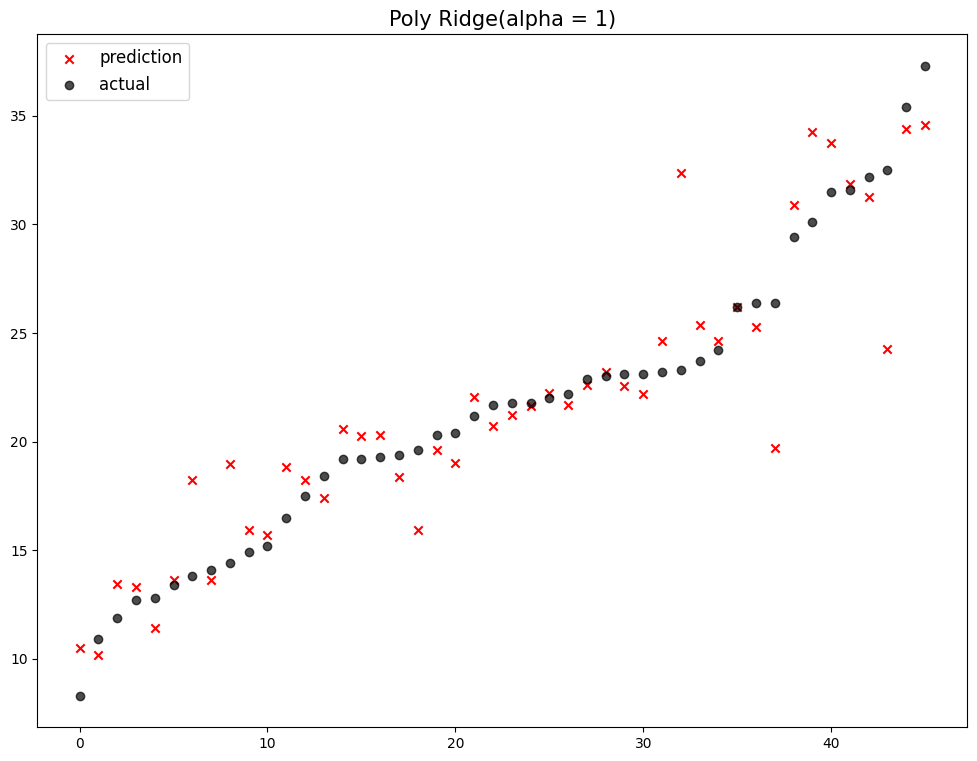


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2               Poly Lasso(alpha = 0.0001)  2.620152
3                    Poly Ridge(alpha = 1)  2.635015
4                   Poly Ridge(alpha = 10)  2.680896
5                         LinearRegression  2.782956
6                    Ridge(alpha = 0.0001)  2.782958
7                     Ridge(alpha = 0.001)  2.782969
8                      Ridge(alpha = 0.01)  2.783082
9                       Ridge(alpha = 0.1)  2.784208
10  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
11  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
12  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
13                   Lasso(alpha = 0.0001)  2.789500
14                        Ridge(alpha = 1)  2.795203
15   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
16   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.819796
17   ElasticNet(alpha=0.001, l1_ratio=0.8)  2

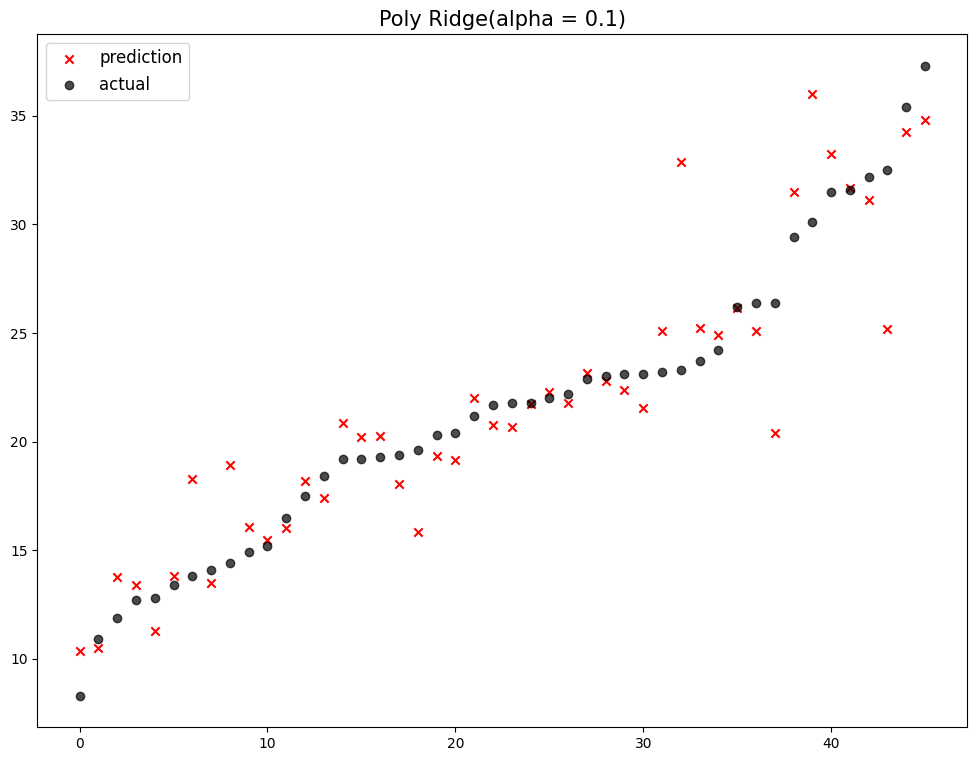


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Lasso(alpha = 0.001)  2.615590
2               Poly Lasso(alpha = 0.0001)  2.620152
3                    Poly Ridge(alpha = 1)  2.635015
4                  Poly Ridge(alpha = 0.1)  2.656497
5                   Poly Ridge(alpha = 10)  2.680896
6                         LinearRegression  2.782956
7                    Ridge(alpha = 0.0001)  2.782958
8                     Ridge(alpha = 0.001)  2.782969
9                      Ridge(alpha = 0.01)  2.783082
10                      Ridge(alpha = 0.1)  2.784208
11  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
12  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
13  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
14                   Lasso(alpha = 0.0001)  2.789500
15                        Ridge(alpha = 1)  2.795203
16   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.800240
17   ElasticNet(alpha=0.001, l1_ratio=0.5)  2

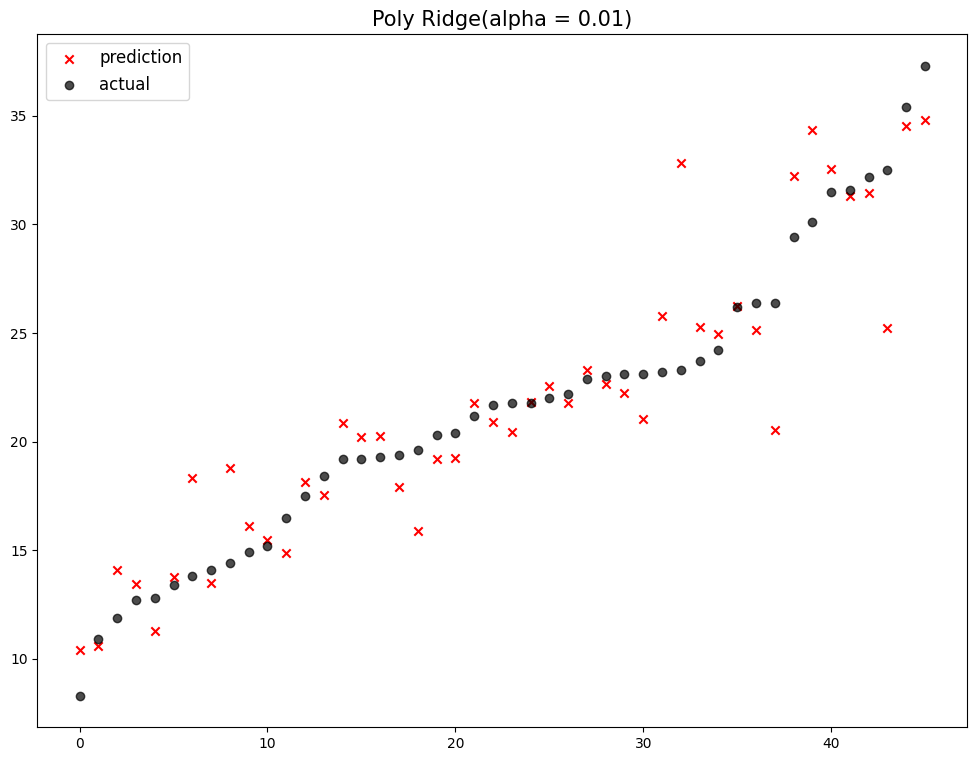


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.01)  2.613608
2                Poly Lasso(alpha = 0.001)  2.615590
3               Poly Lasso(alpha = 0.0001)  2.620152
4                    Poly Ridge(alpha = 1)  2.635015
5                  Poly Ridge(alpha = 0.1)  2.656497
6                   Poly Ridge(alpha = 10)  2.680896
7                         LinearRegression  2.782956
8                    Ridge(alpha = 0.0001)  2.782958
9                     Ridge(alpha = 0.001)  2.782969
10                     Ridge(alpha = 0.01)  2.783082
11                      Ridge(alpha = 0.1)  2.784208
12  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
13  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
14  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
15                   Lasso(alpha = 0.0001)  2.789500
16                        Ridge(alpha = 1)  2.795203
17   ElasticNet(alpha=0.001, l1_ratio=0.2)  2

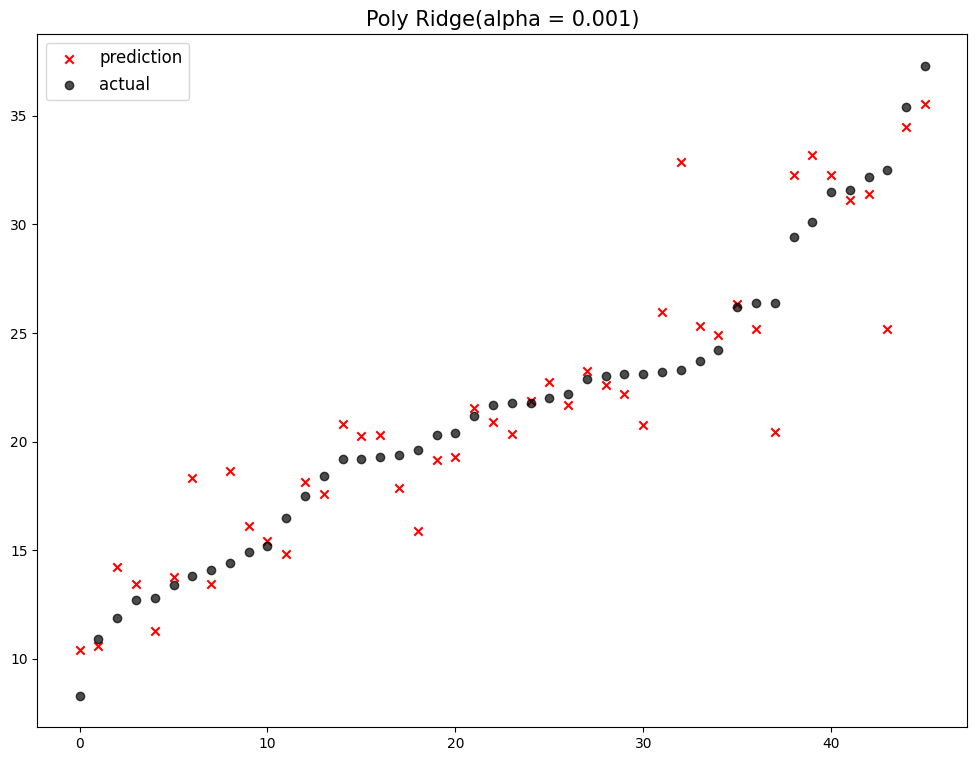


                                     model      rmse
0                    Poly LinearRegression  2.573179
1                Poly Ridge(alpha = 0.001)  2.584788
2                 Poly Ridge(alpha = 0.01)  2.613608
3                Poly Lasso(alpha = 0.001)  2.615590
4               Poly Lasso(alpha = 0.0001)  2.620152
5                    Poly Ridge(alpha = 1)  2.635015
6                  Poly Ridge(alpha = 0.1)  2.656497
7                   Poly Ridge(alpha = 10)  2.680896
8                         LinearRegression  2.782956
9                    Ridge(alpha = 0.0001)  2.782958
10                    Ridge(alpha = 0.001)  2.782969
11                     Ridge(alpha = 0.01)  2.783082
12                      Ridge(alpha = 0.1)  2.784208
13  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
14  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
15  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
16                   Lasso(alpha = 0.0001)  2.789500
17                        Ridge(alpha = 1)  2

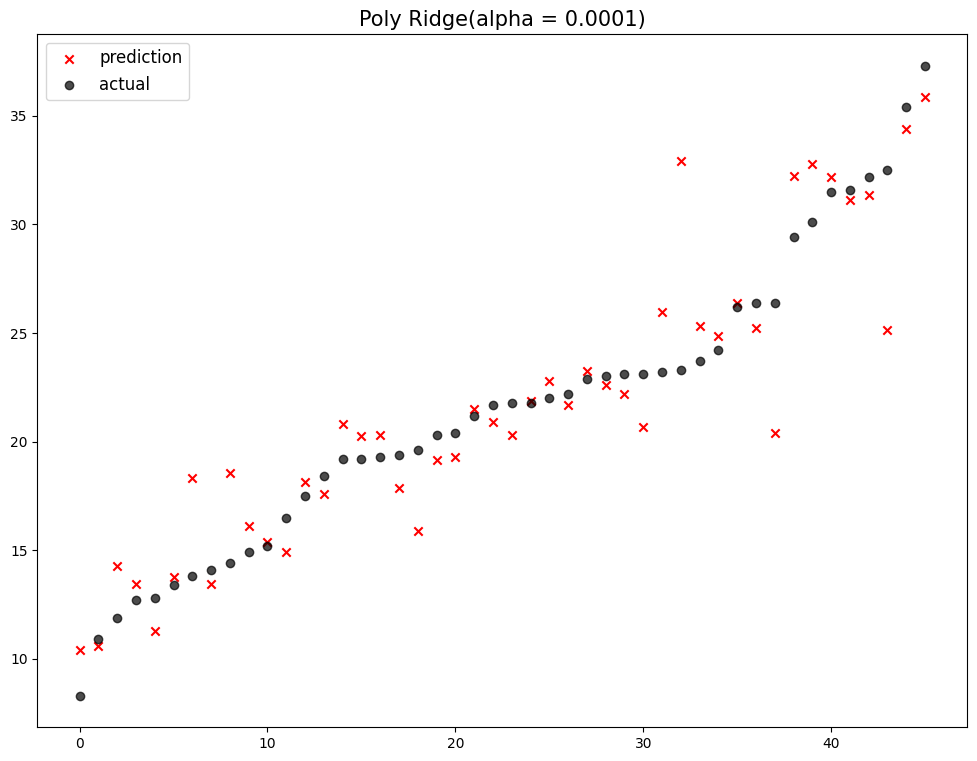


                                     model      rmse
0                    Poly LinearRegression  2.573179
1               Poly Ridge(alpha = 0.0001)  2.575739
2                Poly Ridge(alpha = 0.001)  2.584788
3                 Poly Ridge(alpha = 0.01)  2.613608
4                Poly Lasso(alpha = 0.001)  2.615590
5               Poly Lasso(alpha = 0.0001)  2.620152
6                    Poly Ridge(alpha = 1)  2.635015
7                  Poly Ridge(alpha = 0.1)  2.656497
8                   Poly Ridge(alpha = 10)  2.680896
9                         LinearRegression  2.782956
10                   Ridge(alpha = 0.0001)  2.782958
11                    Ridge(alpha = 0.001)  2.782969
12                     Ridge(alpha = 0.01)  2.783082
13                      Ridge(alpha = 0.1)  2.784208
14  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17                   Lasso(alpha = 0.0001)  2

In [43]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_ridge = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Ridge(alpha = alpha)
    )
    poly_ridge.fit(scaled_X_train, scaled_y_train) # 학습
    poly_ridge_pred = np.expm1(poly_ridge.predict(scaled_X_valid)) # 예측
    rmse_eval('Poly Ridge(alpha = {})'.format(alpha),poly_ridge_pred,y_valid) # 평가 & 시각화

#### **d) ElasticNet**

In [44]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

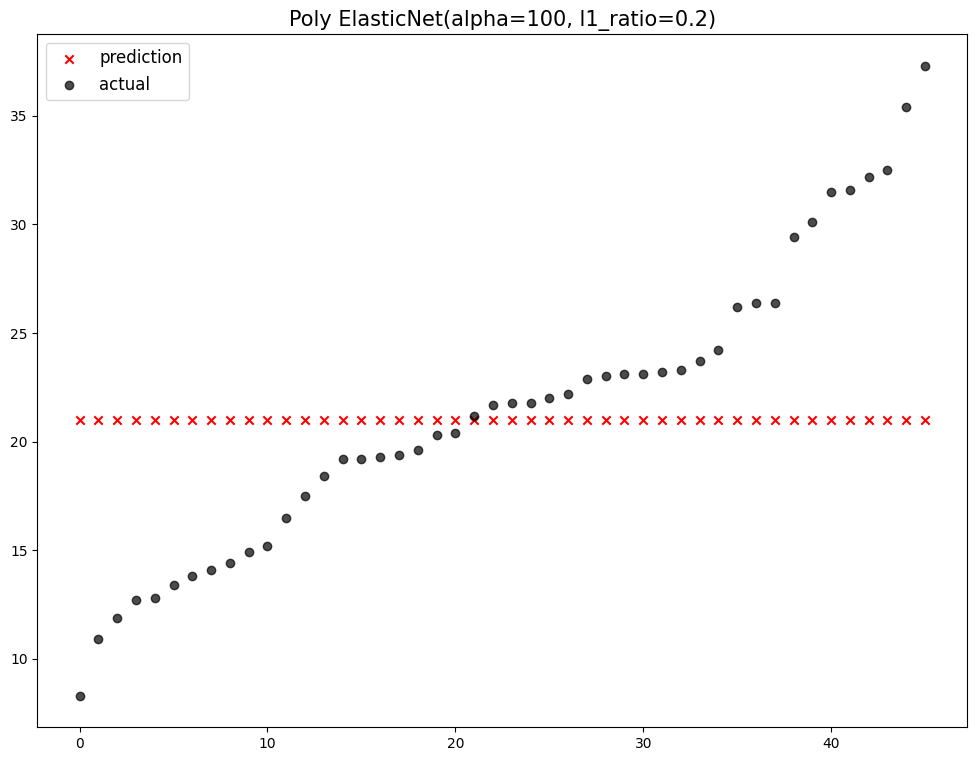


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

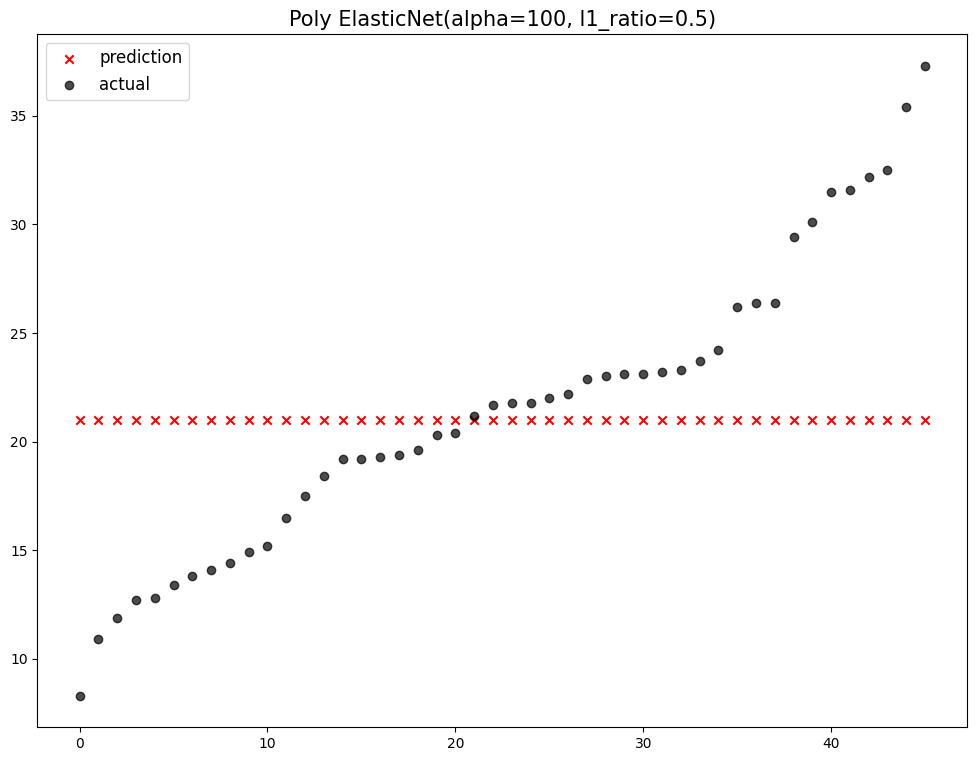


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

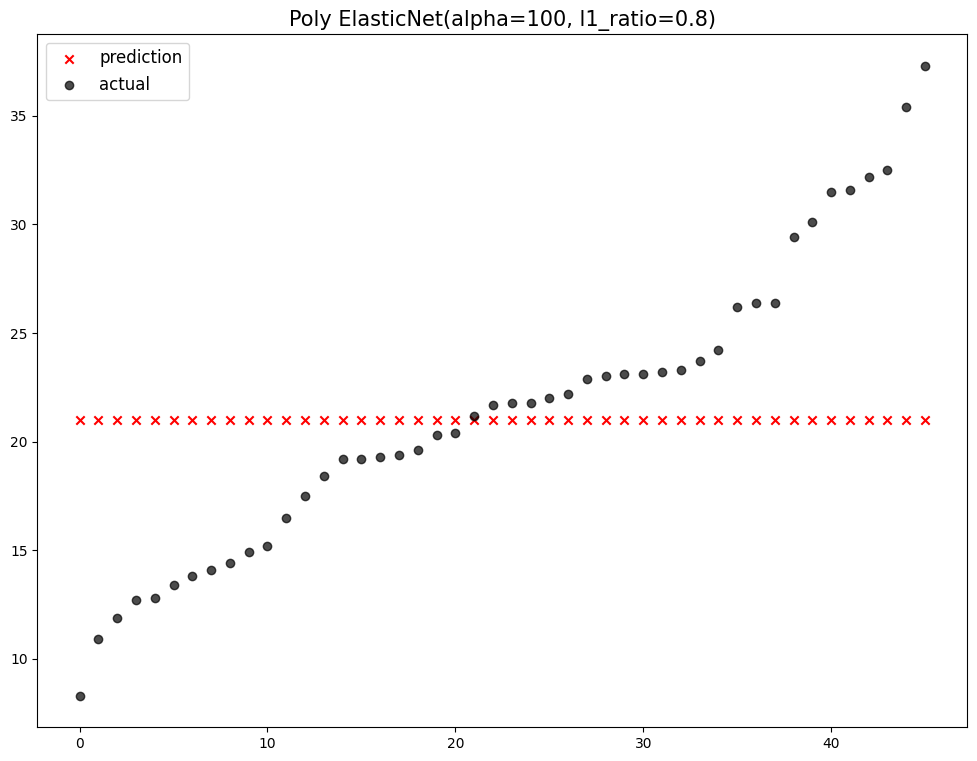


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

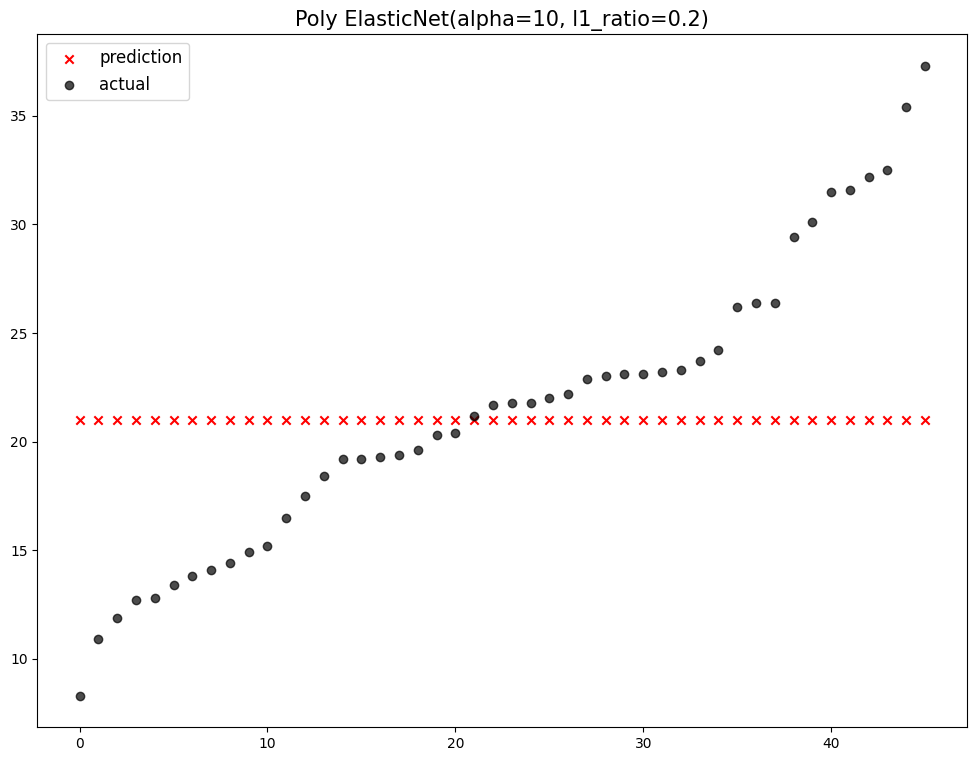


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

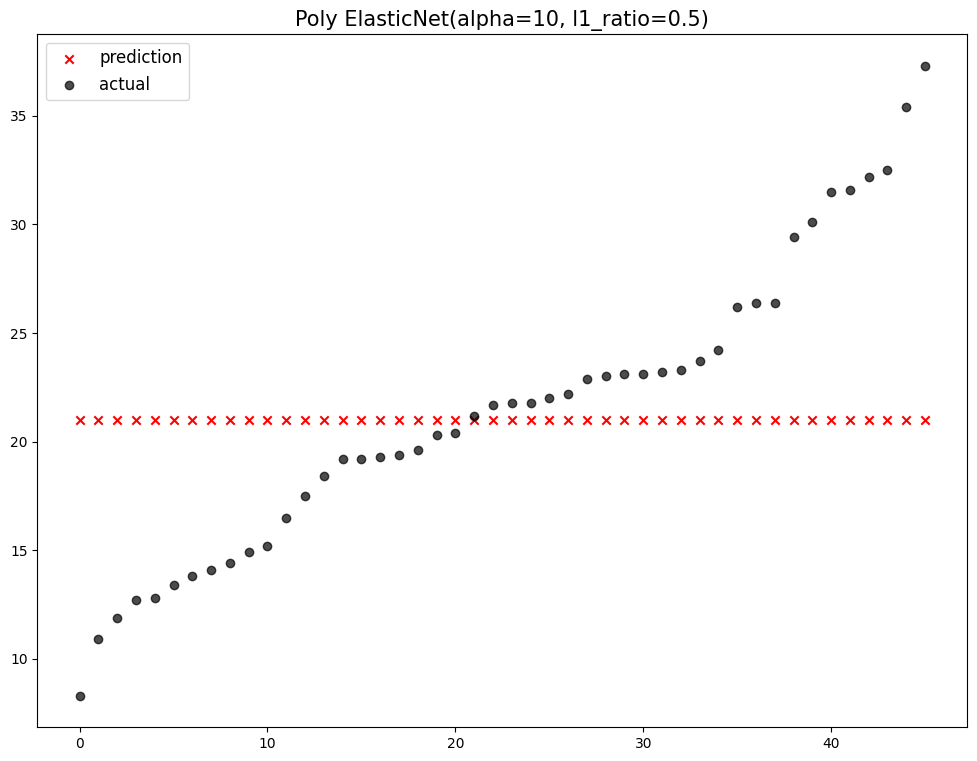


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

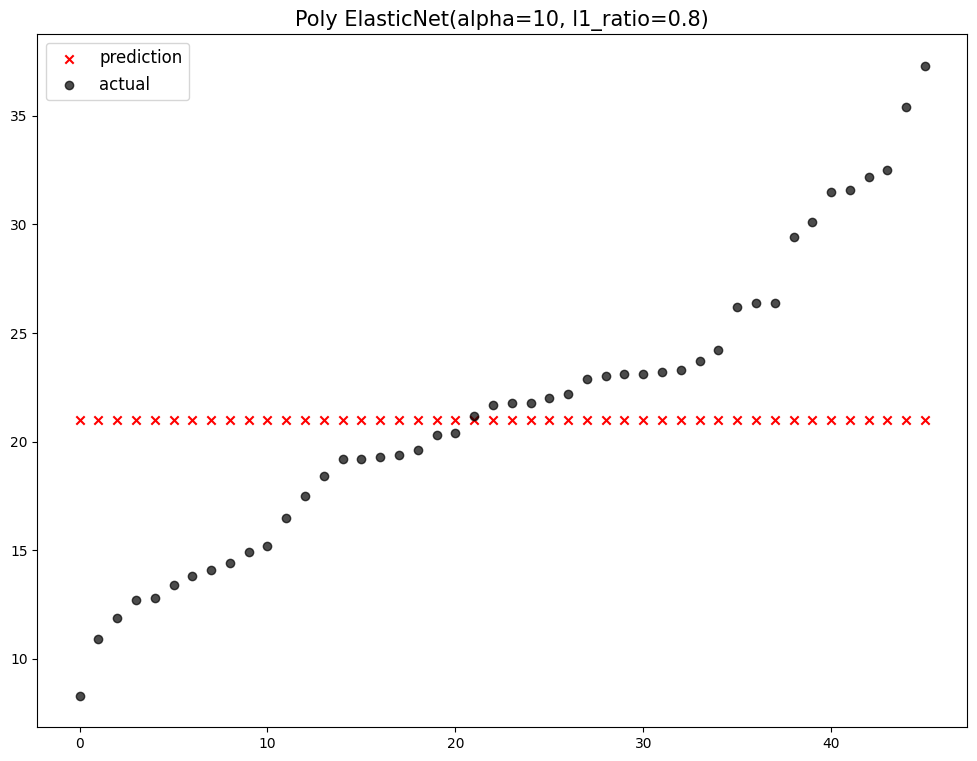


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

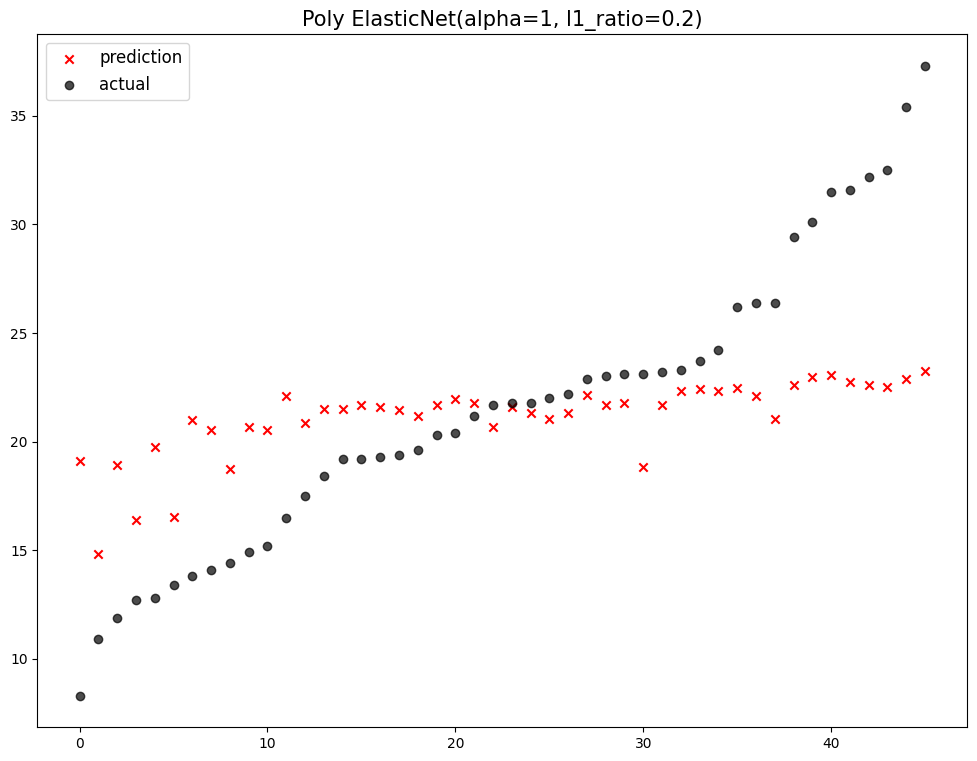


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

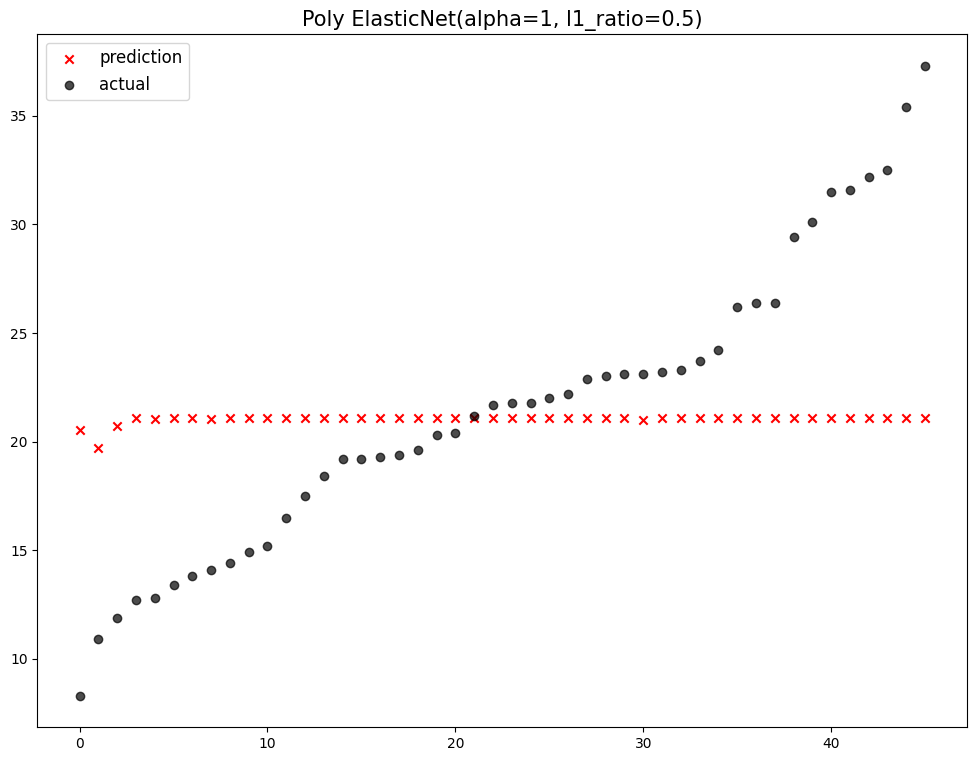


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

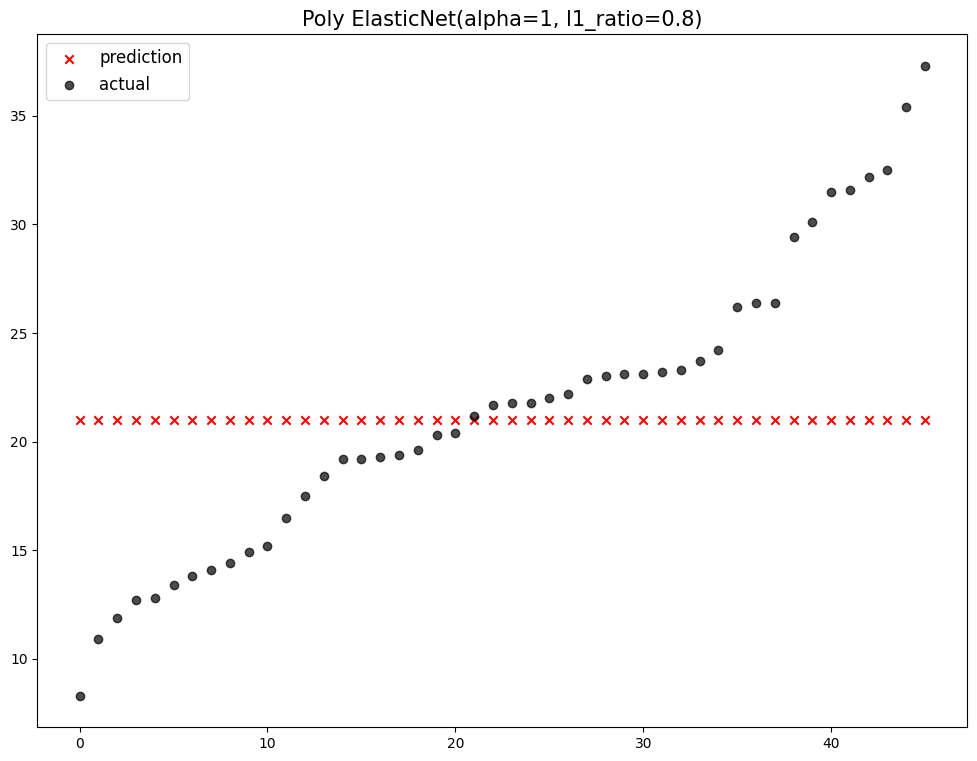


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
5                 Poly Lasso(alpha = 0.0001)  2.620152
6                      Poly Ridge(alpha = 1)  2.635015
7                    Poly Ridge(alpha = 0.1)  2.656497
8                     Poly Ridge(alpha = 10)  2.680896
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782958
11                      Ridge(alpha = 0.001)  2.782969
12                       Ridge(alpha = 0.01)  2.783082
13                        Ridge(alpha = 0.1)  2.784208
14    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.784678
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.786469
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.788282
17       

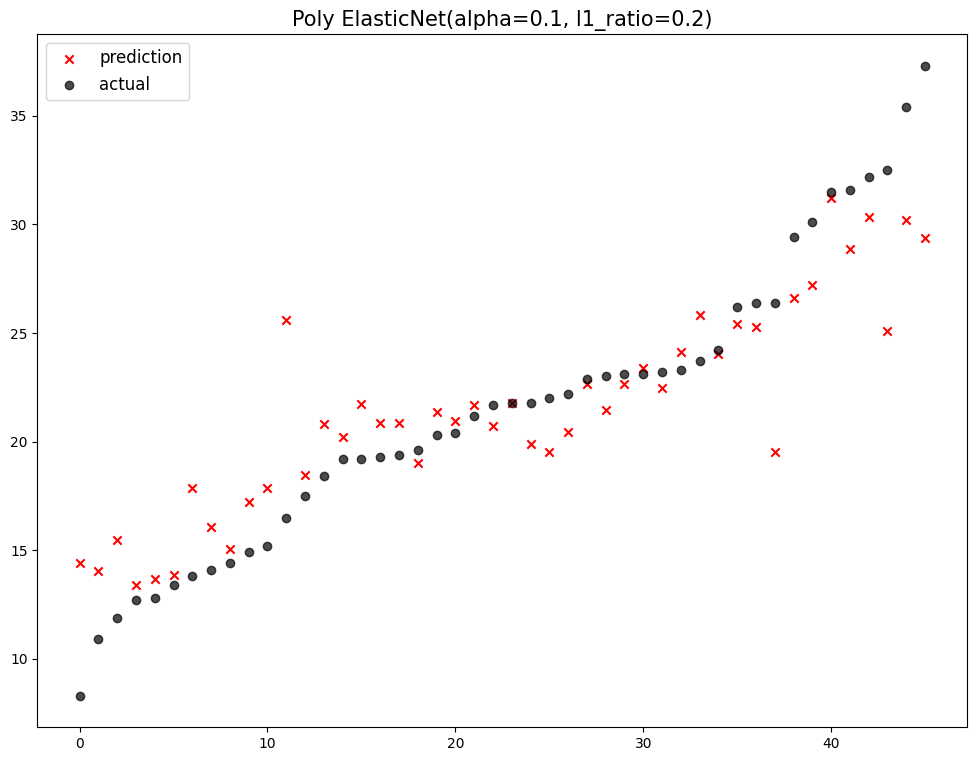


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
56  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
57   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
58   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
59   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
60    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[61 rows x 2 columns]


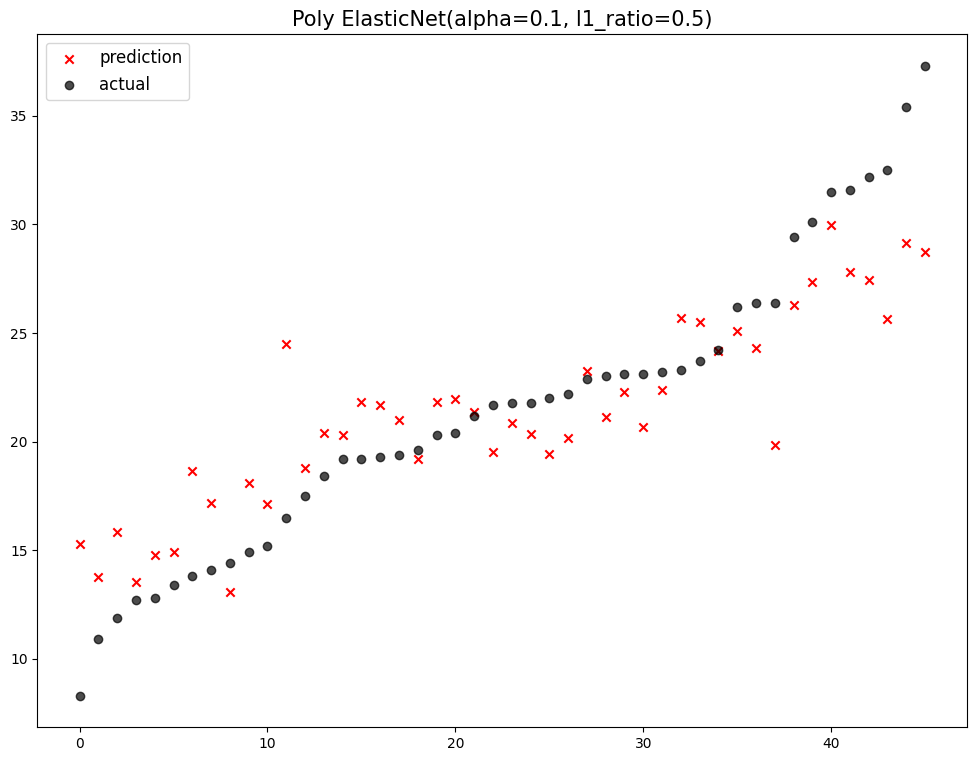


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
57  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
58   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
59   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
60   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
61    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[62 rows x 2 columns]


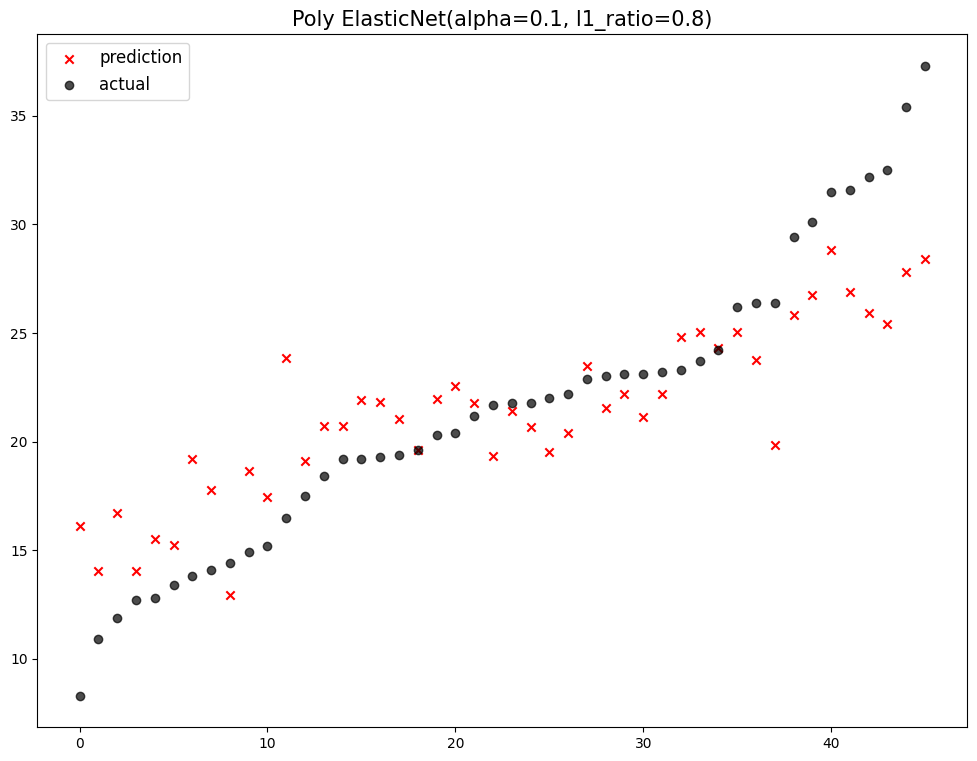


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
58  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
59   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
60   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
61   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
62    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[63 rows x 2 columns]


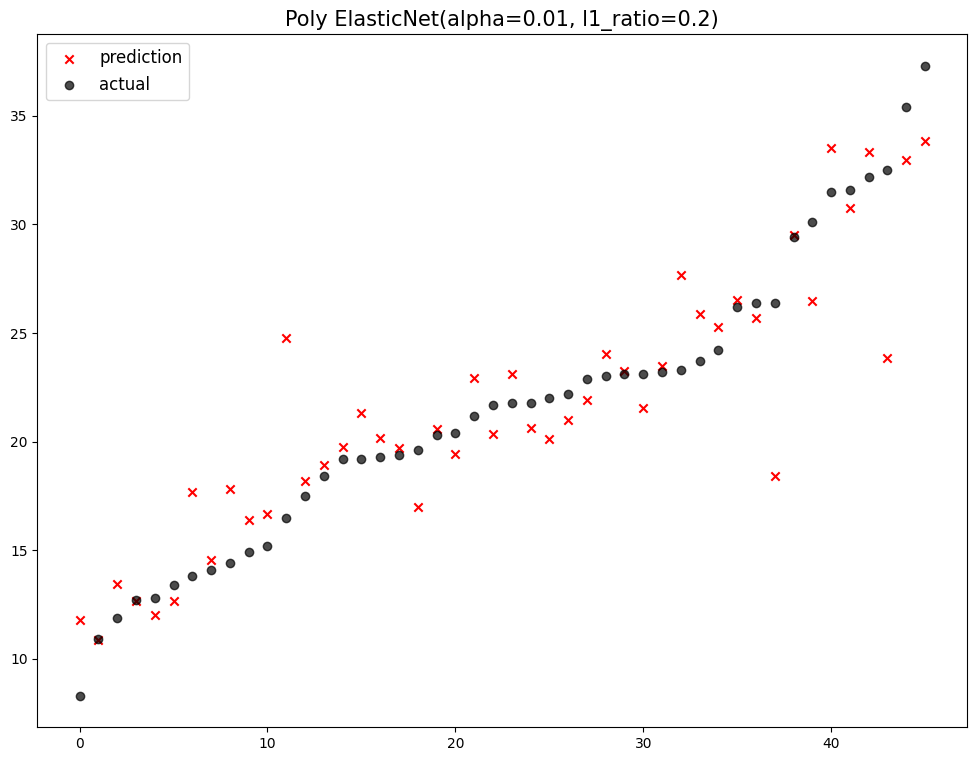


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
59  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
60   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
61   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
62   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
63    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[64 rows x 2 columns]


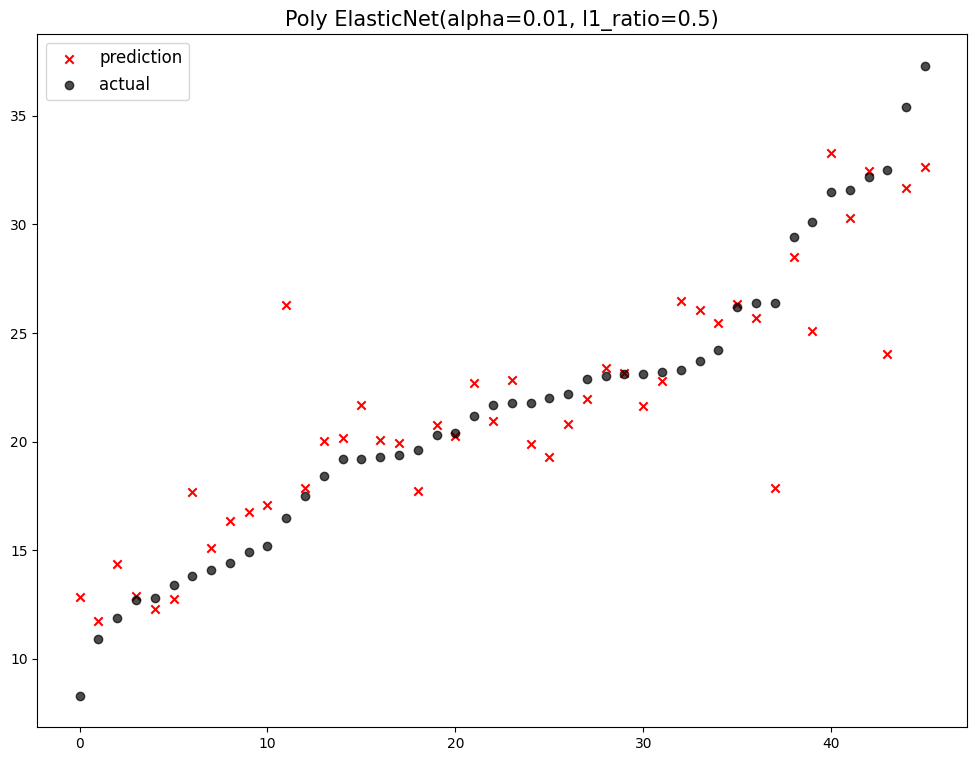


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
60  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
61   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
62   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
63   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
64    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[65 rows x 2 columns]


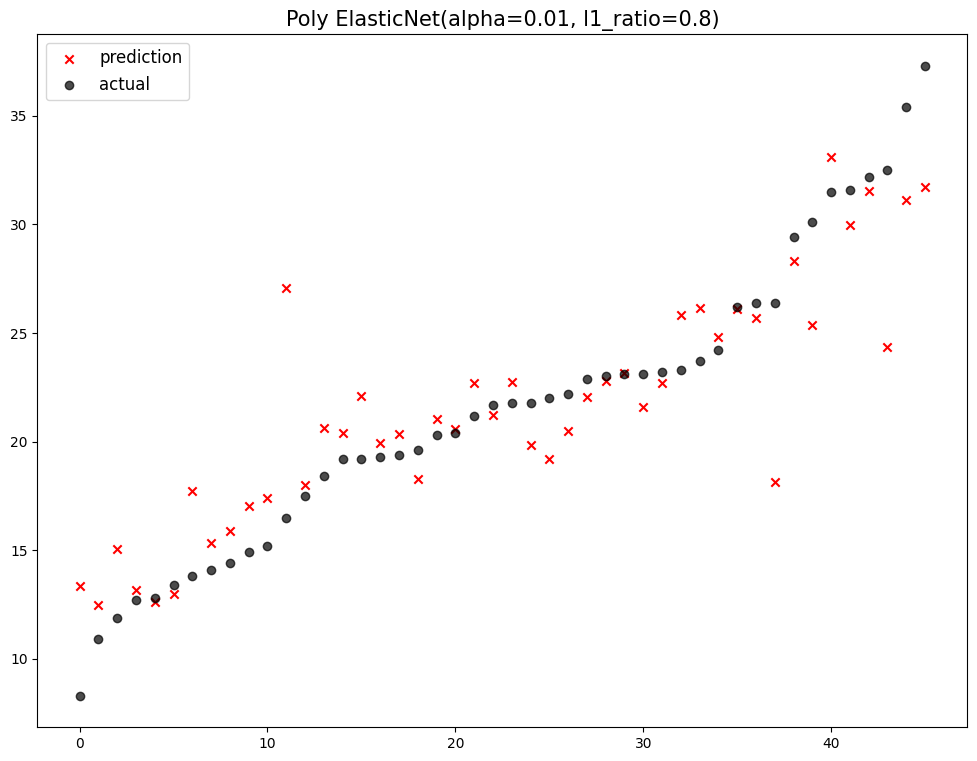


                                       model      rmse
0                      Poly LinearRegression  2.573179
1                 Poly Ridge(alpha = 0.0001)  2.575739
2                  Poly Ridge(alpha = 0.001)  2.584788
3                   Poly Ridge(alpha = 0.01)  2.613608
4                  Poly Lasso(alpha = 0.001)  2.615590
..                                       ...       ...
61  Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
62   Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
63   Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
64   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
65    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[66 rows x 2 columns]


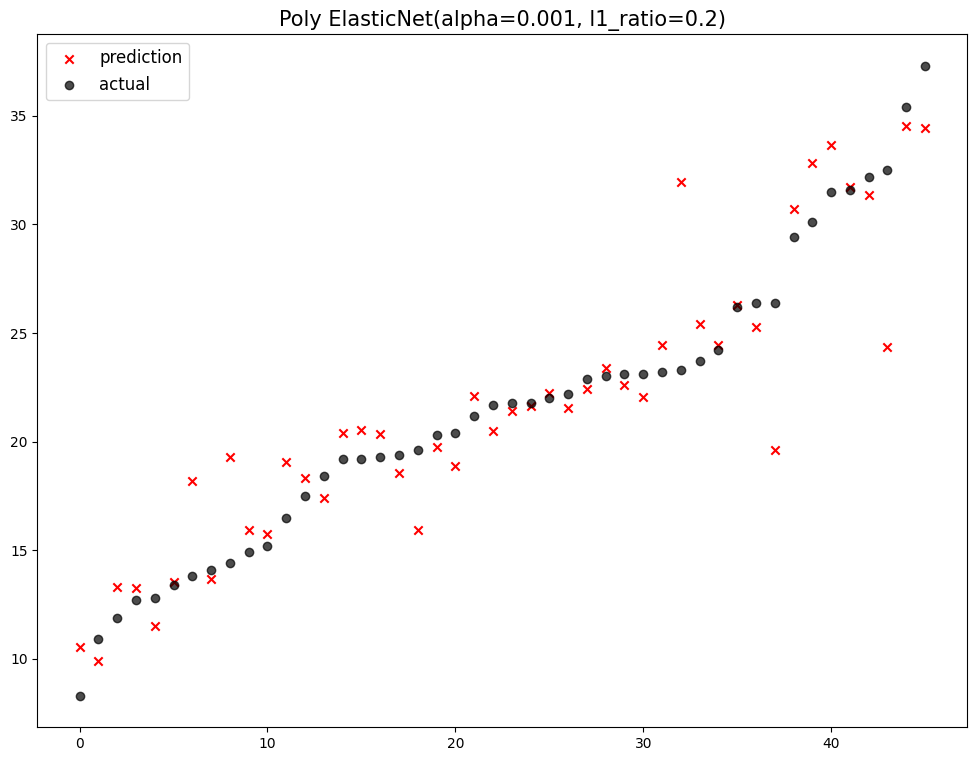


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4                     Poly Ridge(alpha = 0.01)  2.613608
..                                         ...       ...
62    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
63     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
64     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
65     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
66      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[67 rows x 2 columns]


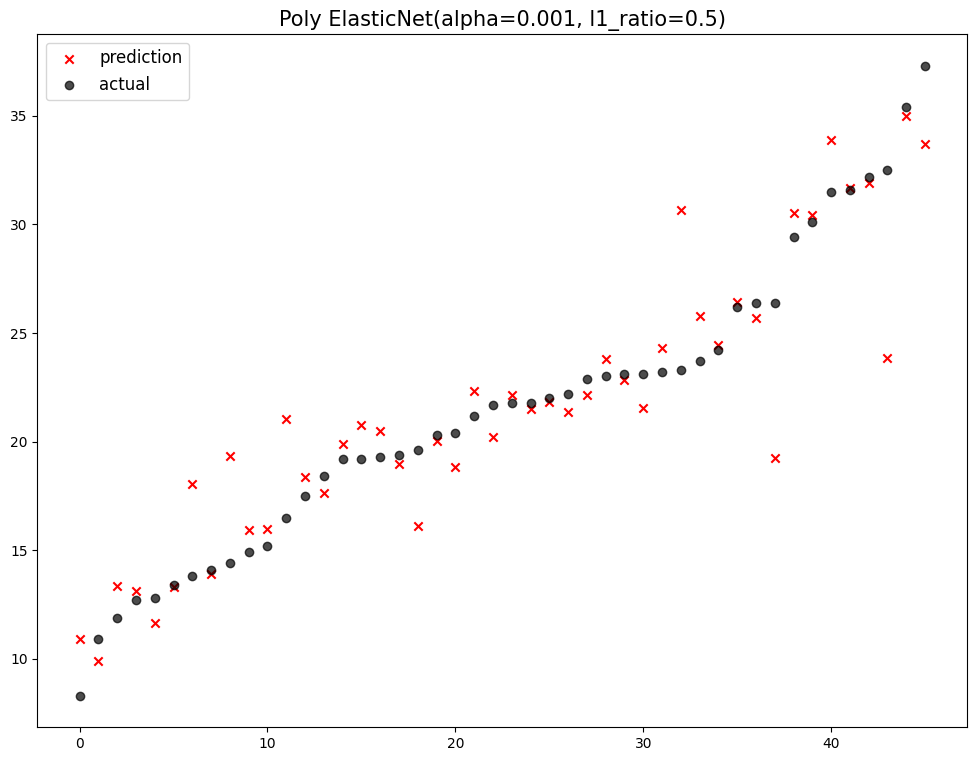


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.604435
..                                         ...       ...
63    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
64     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
65     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
66     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
67      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[68 rows x 2 columns]


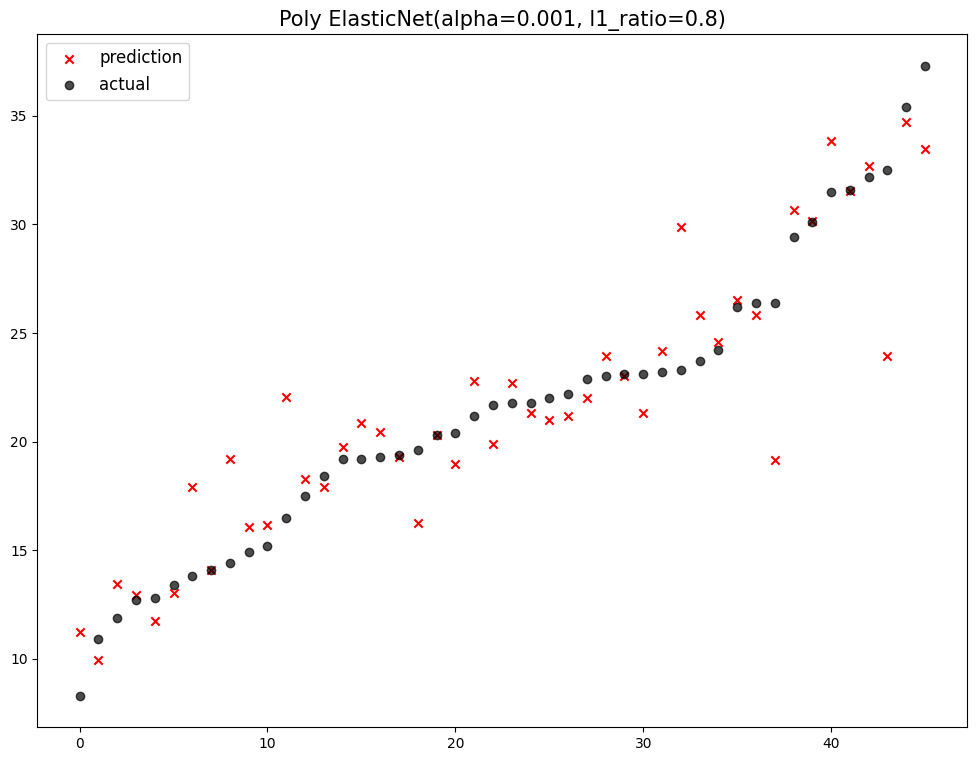


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.604435
..                                         ...       ...
64    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
65     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
66     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
67     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
68      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[69 rows x 2 columns]


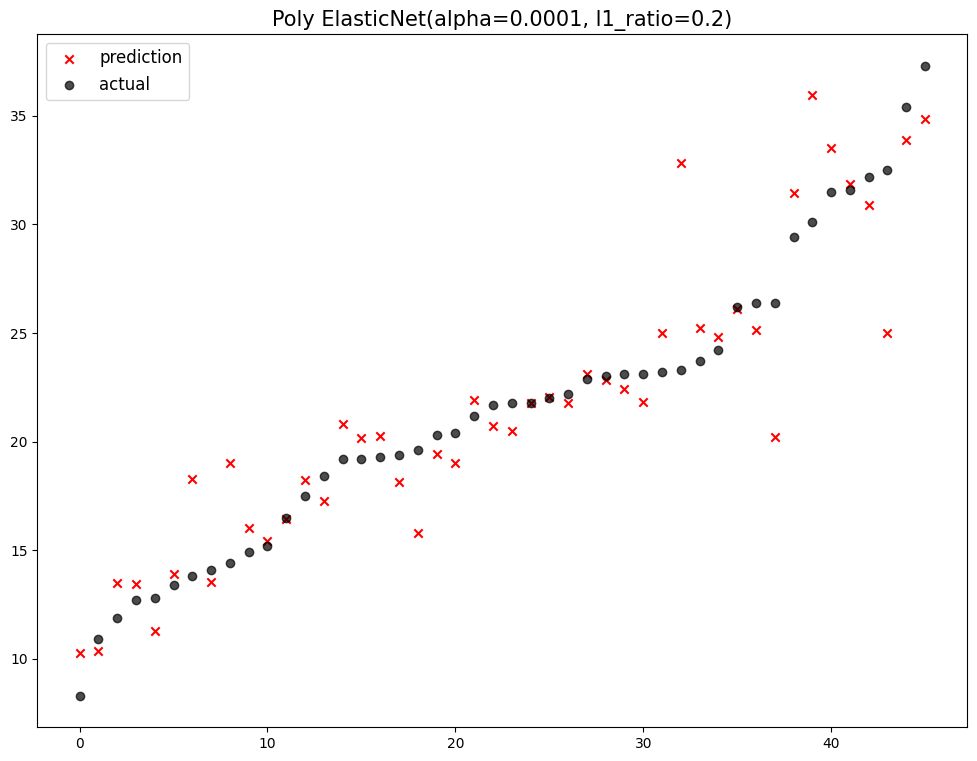


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.604435
..                                         ...       ...
65    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
66     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
67     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
68     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
69      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[70 rows x 2 columns]


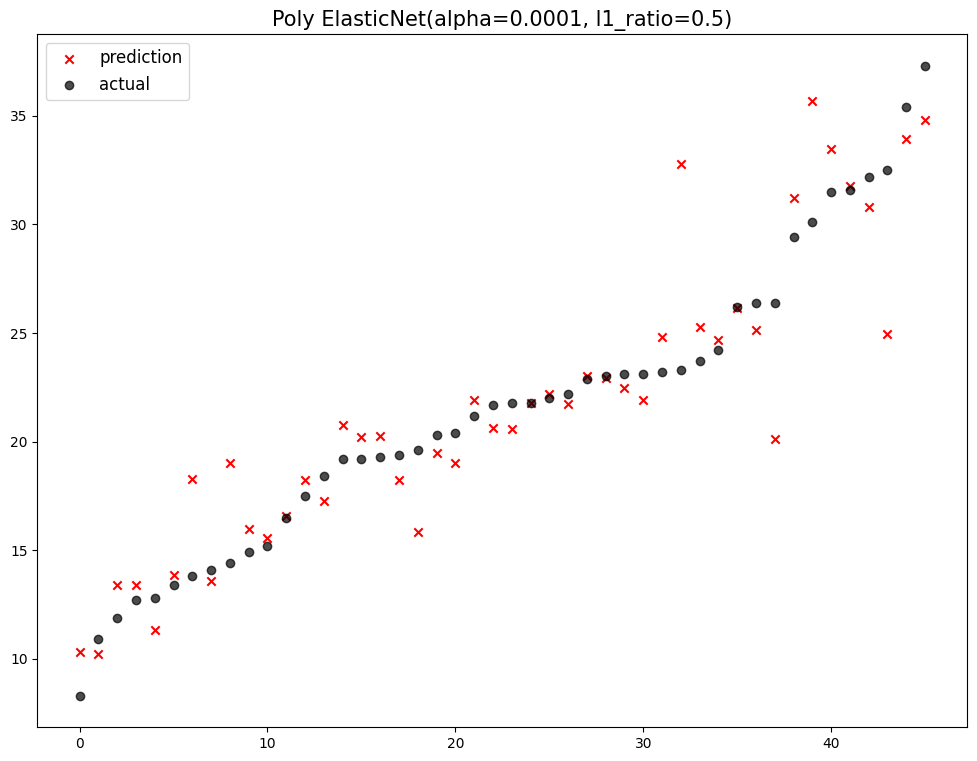


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.604435
..                                         ...       ...
66    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
67     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
68     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
69     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
70      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[71 rows x 2 columns]


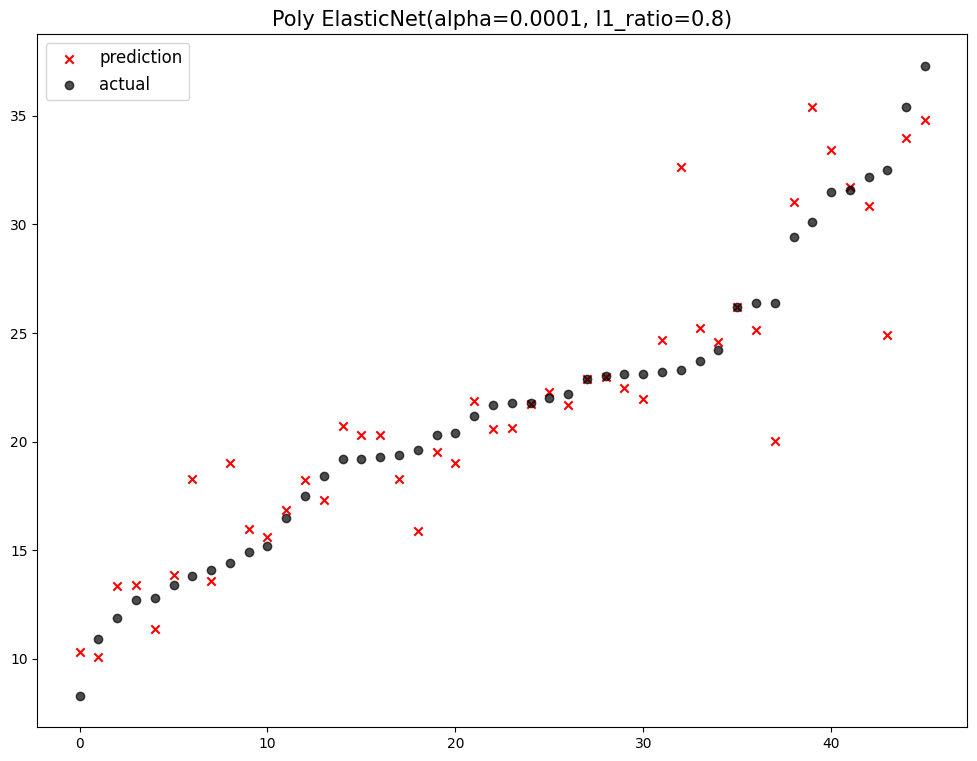


                                         model      rmse
0   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.572756
1                        Poly LinearRegression  2.573179
2                   Poly Ridge(alpha = 0.0001)  2.575739
3                    Poly Ridge(alpha = 0.001)  2.584788
4   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.604435
..                                         ...       ...
67    Poly ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
68     Poly ElasticNet(alpha=10, l1_ratio=0.2)  6.673060
69     Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
70     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
71      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[72 rows x 2 columns]


In [45]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        # 모델 객체 생성
        poly_elasticnet = make_pipeline(
            PolynomialFeatures(degree = 2,include_bias = False),
            ElasticNet(alpha = alpha, l1_ratio = ratio)
        )
        poly_elasticnet.fit(scaled_X_train, scaled_y_train) # 학습
        poly_elasticnet_pred = np.expm1(poly_elasticnet.predict(scaled_X_valid)) # 예측
        rmse_eval('Poly ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), poly_elasticnet_pred, y_valid) # 평가

### **5-7. 최종 회귀 모형 선택**

- RMSE 값이 가장 작은 **PolyElasticNet(alpha = 0.001, l1_ratio = 0.2)** 모델이 가장 예측 성능이 좋은 회귀 모델이라 평가할 수 있다.

In [46]:
# 모델 객체 생성
poly_ela = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    ElasticNet(alpha = 0.001,l1_ratio = 0.2)
)
poly_ela.fit(scaled_X_train, scaled_y_train) # 학습
poly_ela_pred = np.expm1(poly_ela.predict(scaled_X_valid)) # 예측

# **6. 제출 파일 생성**

In [47]:
### 정답 파일 예시 확인

submit = pd.read_csv('./datasets/sample_submission.csv')
submit.head(3) # 3개의 데이터만 확인

,ID,MEDV
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0


In [48]:
### 가장 성능이 좋았던 PolyLasso(alpha = 100) 모델로 예측

submit['MEDV'] = np.expm1(poly_ela.predict(scaled_test))
submit.head()

,ID,MEDV
0,TEST_000,20.025737
1,TEST_001,55.427975
2,TEST_002,15.288043
3,TEST_003,22.538902
4,TEST_004,21.763429


In [49]:
### 제출 파일 저장

submit.to_csv('./submit_std_target.csv', index=False)